In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy.special import expit

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)


data = pd.read_csv('GLM_PROJECT.csv')


print(data)


           date  steps  distance  runDistance  calories  deepSleepTime  \
0      1/1/2022   6811      4833          337       188             68   
1      1/2/2022   5926      4128          346       163             83   
2      1/3/2022  10435      7564          396       279             66   
3      1/4/2022   9425      7167          210       279            123   
4      1/5/2022  10998      8110          326       304             32   
..          ...    ...       ...          ...       ...            ...   
186  12/27/2022   7208      4996          331       192             97   
187  12/28/2022   5027      3492          258       122            128   
188  12/29/2022   7286      5126          203       195             89   
189  12/30/2022  11095      8172          570       313            141   
190  12/31/2022   7074      5168          468       209            128   

     shallowSleepTime  heartRate  SleepQuality  
0                 381  85.179357             1  
1            



# >  In this project different codes  has been developed using the PyMC3 library to perform a binomial regression analysis on a dataset called "GLM_PROJECT.csv".

# > The data contains 8 different  variables, "steps" and "distance","runDistance","calories","deepSleepTime","shallowSleepTime","heartRate",      "SleepQuality


# > The data has been generated daily via Xiaomi Bip Lite Smart Watch and has been downloaded from Zepp Life application. 


# > While the variable step represents how many steps are taken in a day, sleep quality represents whether a good sleep is achieved according to sleep parameters.

> # > MODEL 1




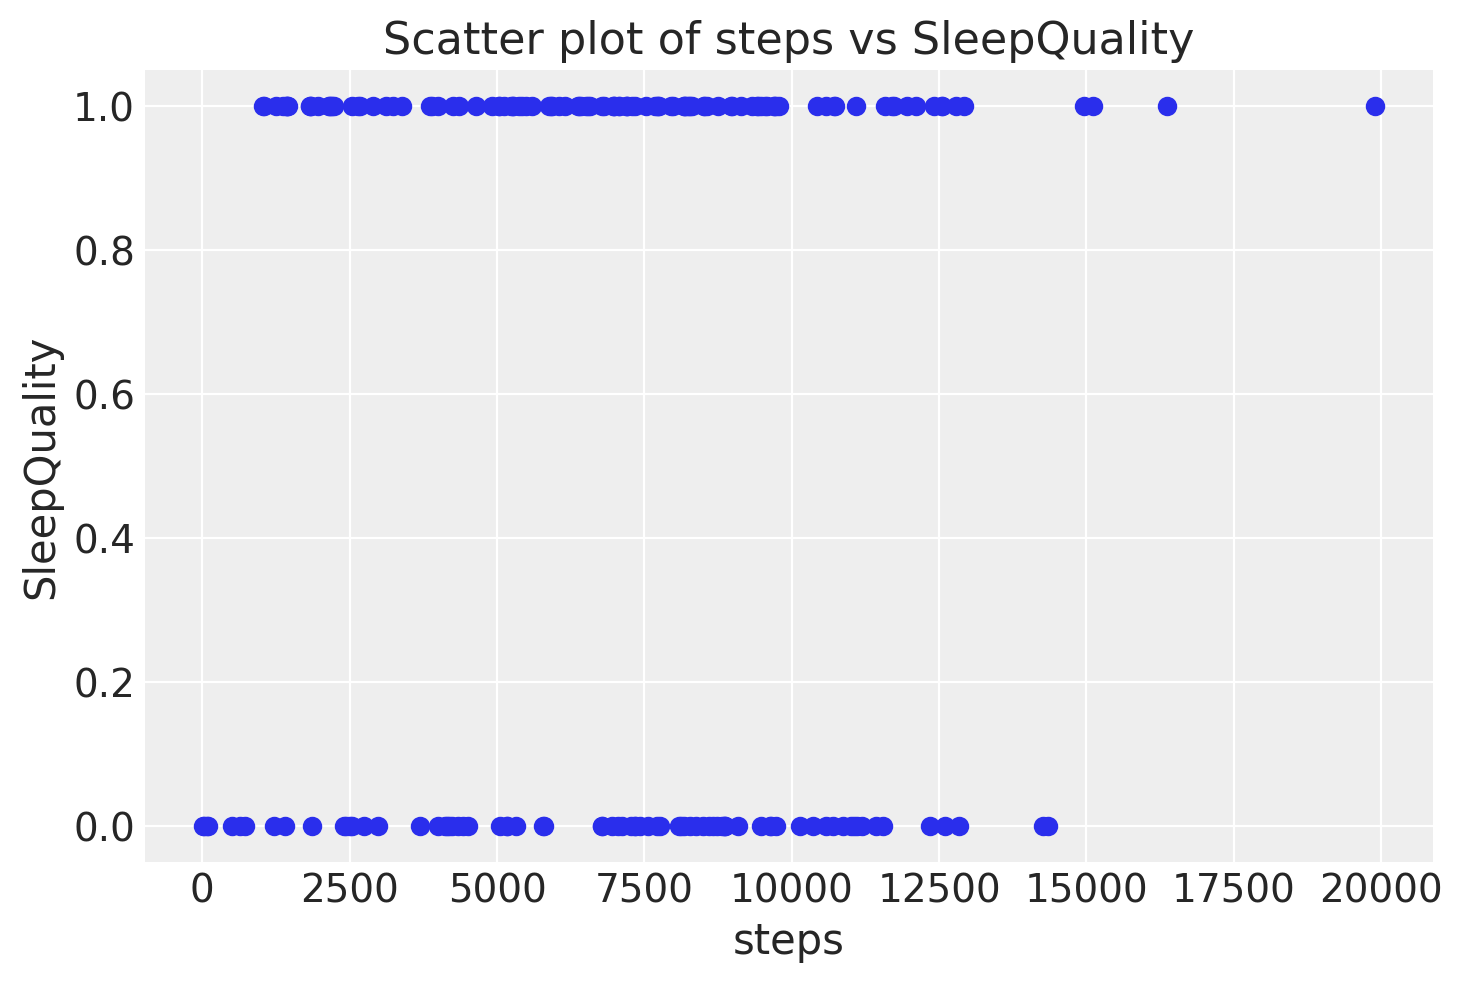

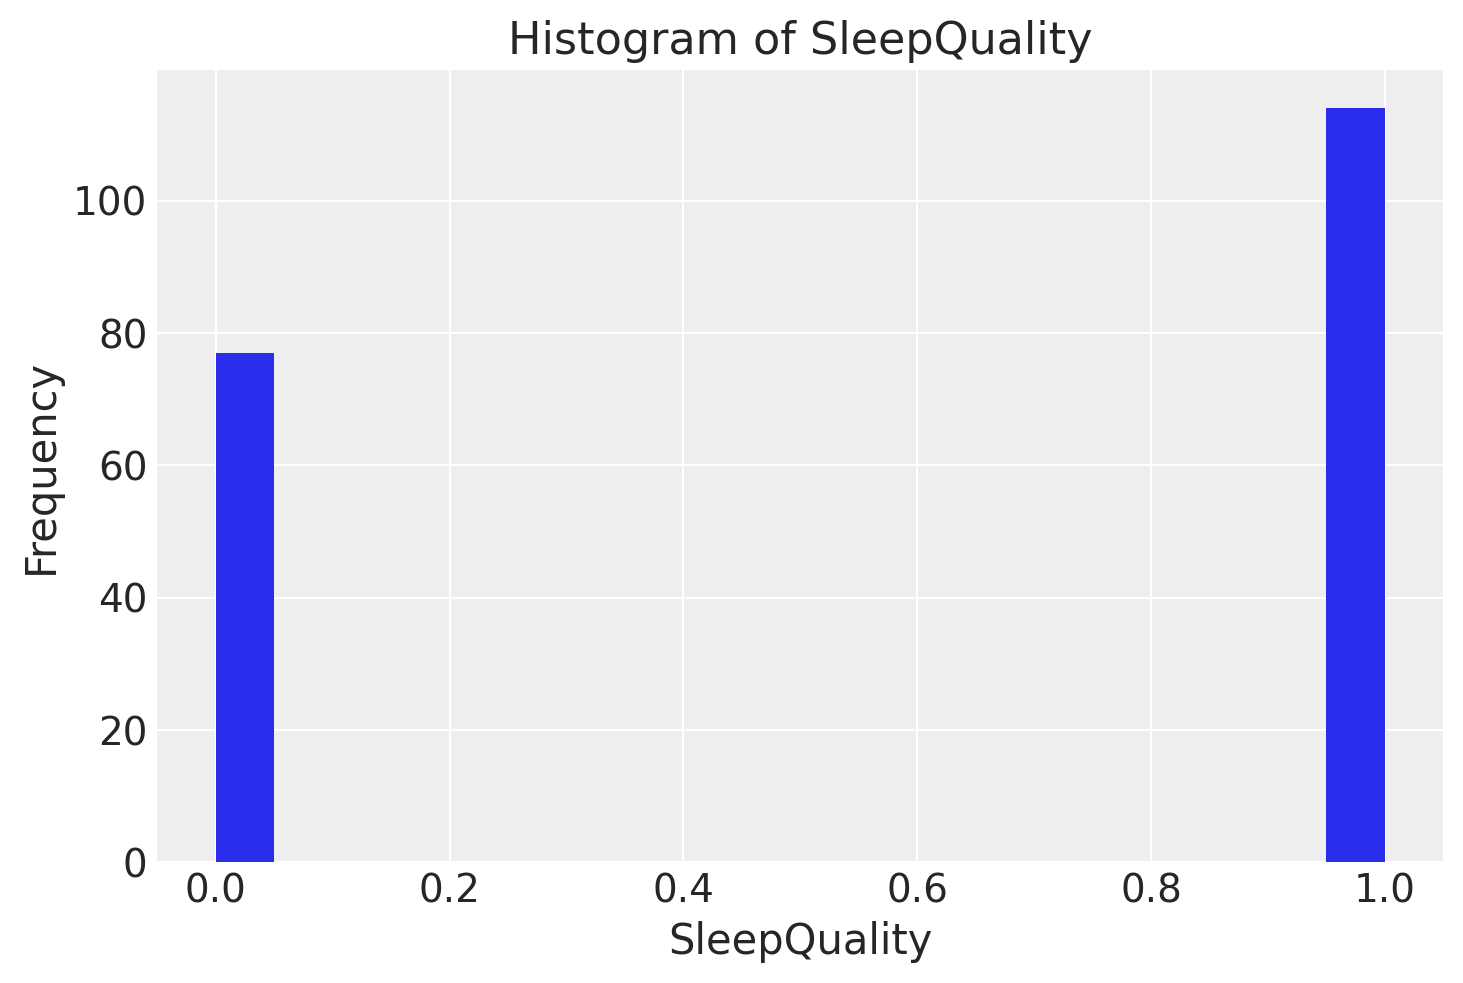

In [ ]:
# Scatter plot of steps vs SleepQuality
plt.scatter(data['steps'], data['SleepQuality'])
plt.xlabel('steps')
plt.ylabel('SleepQuality')
plt.title('Scatter plot of steps vs SleepQuality')
plt.show()

# Histogram of SleepQuality
plt.hist(data['SleepQuality'], bins=20)
plt.xlabel('SleepQuality')
plt.ylabel('Frequency')
plt.title('Histogram of SleepQuality')
plt.show()


# In this section models developed as μ = β0 + β1 * x and prior checks has been developed for mu=0 and sigma=1

ERROR:pymc3:There were 58290 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 58290 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f692eb06340>,
      dtype=object)

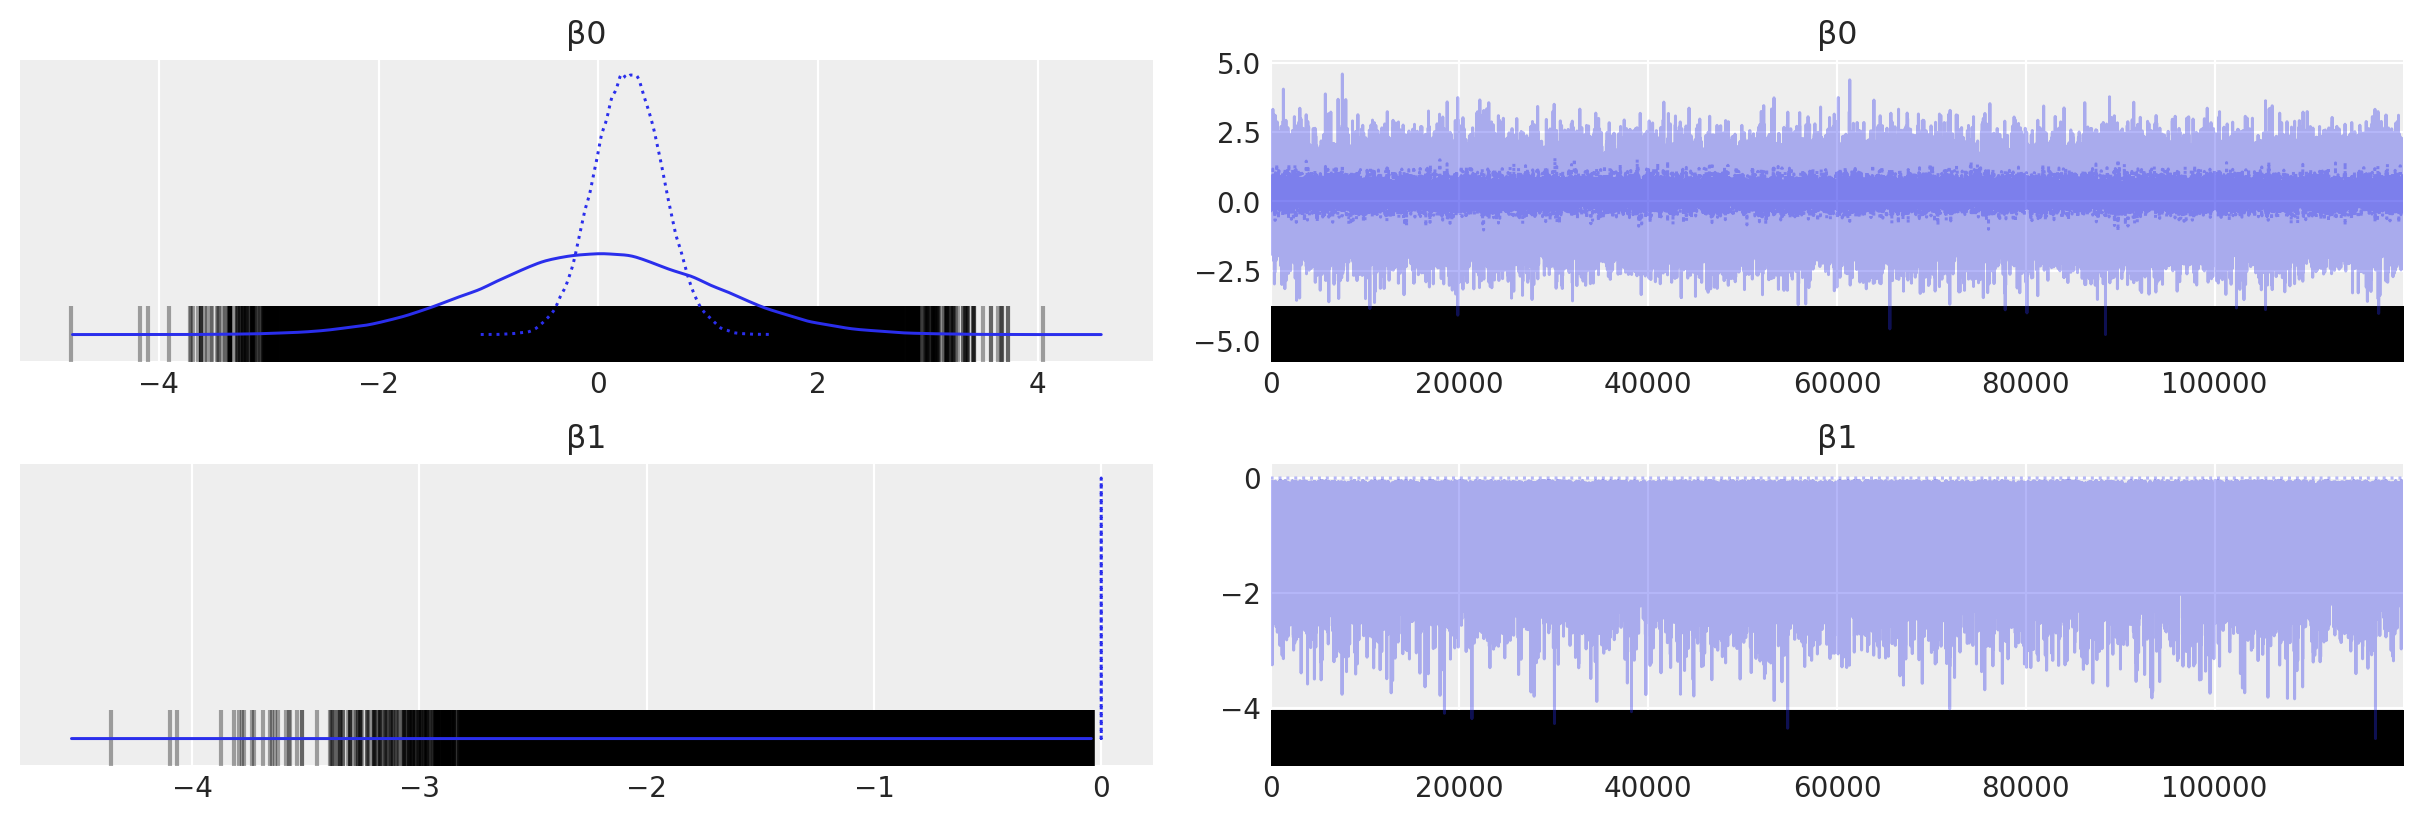

In [ ]:
coords = {"observation": data.index.values}

coords

coords = {"observation": data.index.values}
with pm.Model(coords=coords) as binomial_regression_model:
    x = pm.Data("steps", data["steps"], dims="observation")
    # priors
    β0 = pm.Normal("β0", mu=0, sigma=1)
    β1 = pm.Normal("β1", mu=0, sigma=1)
    # linear model
    μ = β0 + β1 * x
    p = pm.Deterministic("p", pm.math.invlogit(μ), dims="observation")
    # likelihood
    pm.Binomial("y", n=1, p=p, observed=data["SleepQuality"], dims="observation")

#return_inferencedatabool, default=FalseWhether to return the trace as an arviz.InferenceData (True) object or a MultiTrace (False) Defaults to False, but we’ll switch to True in an upcoming release.
with binomial_regression_model:
   
    trace = pm.sample(120000, tune=100000, return_inferencedata=True)
    
az.plot_trace(trace, var_names=["β0", "β1"])

# According the above result , it can be clearly seen that prior checks does not give proper result especially β1 result. There are some reason about that first of all the data is not enough for analyses secondly there is no really corelation or relation between step and sleepquality. Also β1 says that there is corelated noise in the data.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,0.128,0.763,-1.570,1.581,0.103,0.165,85.0,34.0,1.22
β1,-0.430,0.604,-1.616,0.000,0.323,0.251,3.0,34.0,1.83


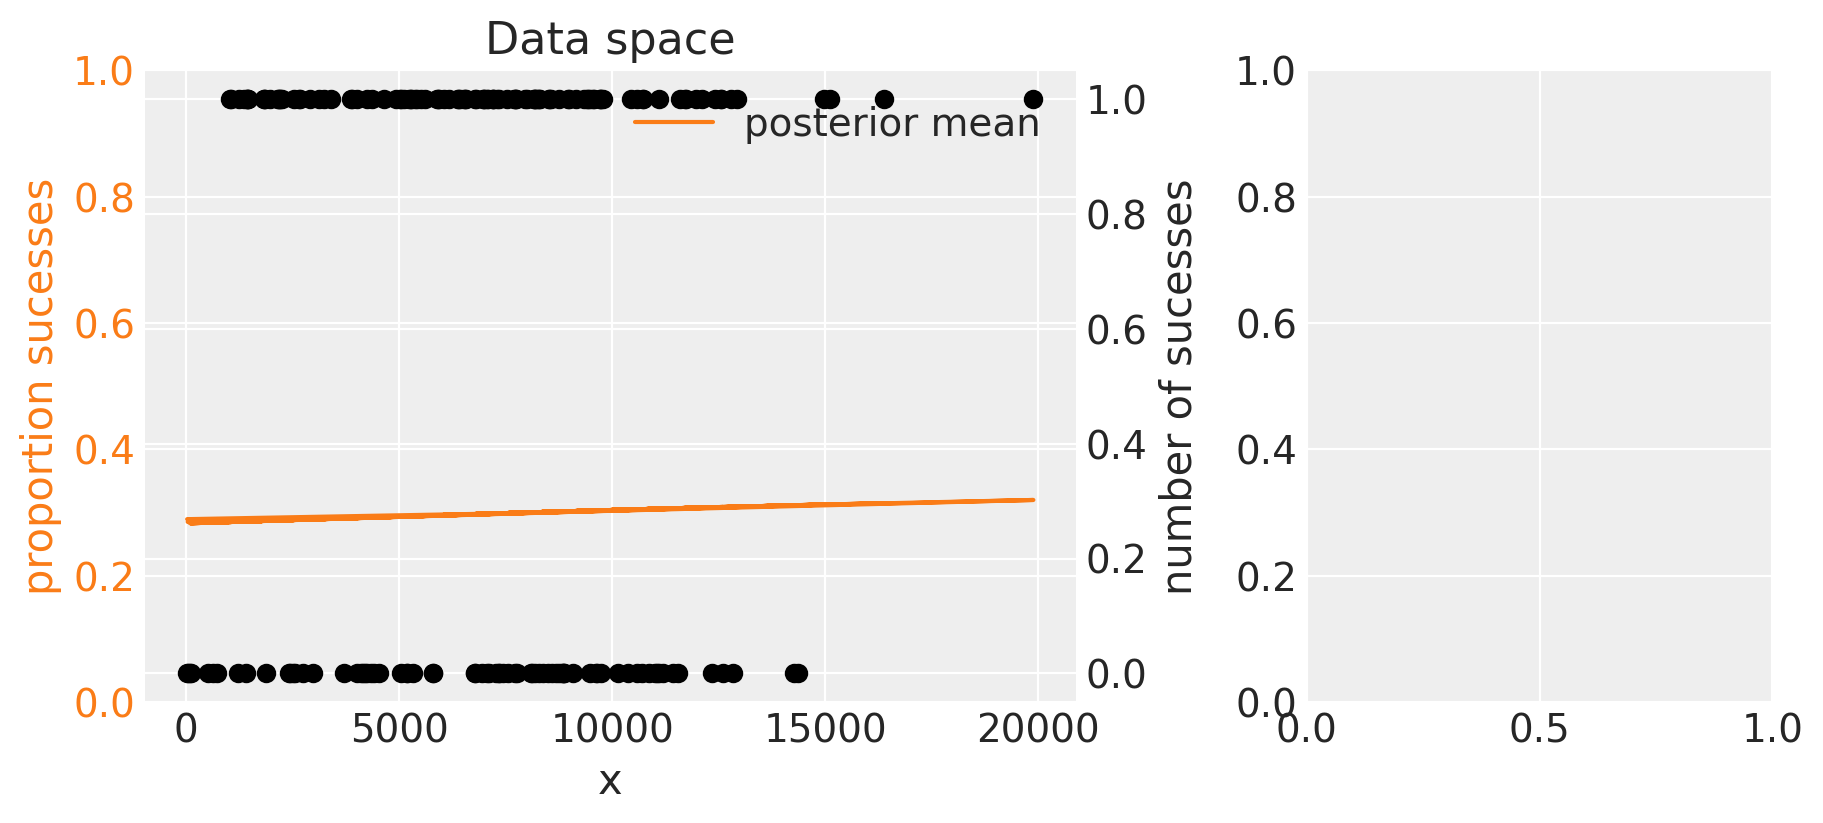

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={"width_ratios": [2, 1]})

# posterior mean
post_mean = trace.posterior.stack(sample=("chain", "draw"))["p"].mean("sample")
ax[0].plot( data["steps"], post_mean, label="posterior mean", color="C1")
ax[0].set(ylim=[0,1])
ax[0].set(xlabel="x", title="Data space")
ax[0].set_ylabel("proportion sucesses", color="C1")
ax[0].tick_params(axis="y", labelcolor="C1")
ax[0].legend()
# instantiate a second axes that shares the same x-axis
freq = ax[0].twinx()
freq.set_ylabel("number of sucesses")
freq.scatter( data["steps"], data["SleepQuality"], color="k", label="data")

# Summarize the posterior distributions of the parameters
az.summary(trace, var_names=["β0", "β1"])


# With the posterior checks and summary of data analyses  the coefficient estimates appear to have high uncertainty, as indicated by the large standard deviations and wide HDI intervals, and the r_hat values for both coefficients are larger than 1, indicating that the chains did not converge well. This suggests that the model may not be a good fit for the data. There is a small correlation according to posterior means but this is not enough for model. 

# As mentioned above there are some reason for this uncertainty. There is no eonugh data and due to sensor values and sleepqulity depends on a calculation metric in smartwatch this model is not fit properly. 

> # >MODEL 2


# > Secondly the model has been developed via same codes for invetigating heartRate and SleepQuality relation. It can be seen that HeartRate and SleepQuality data.


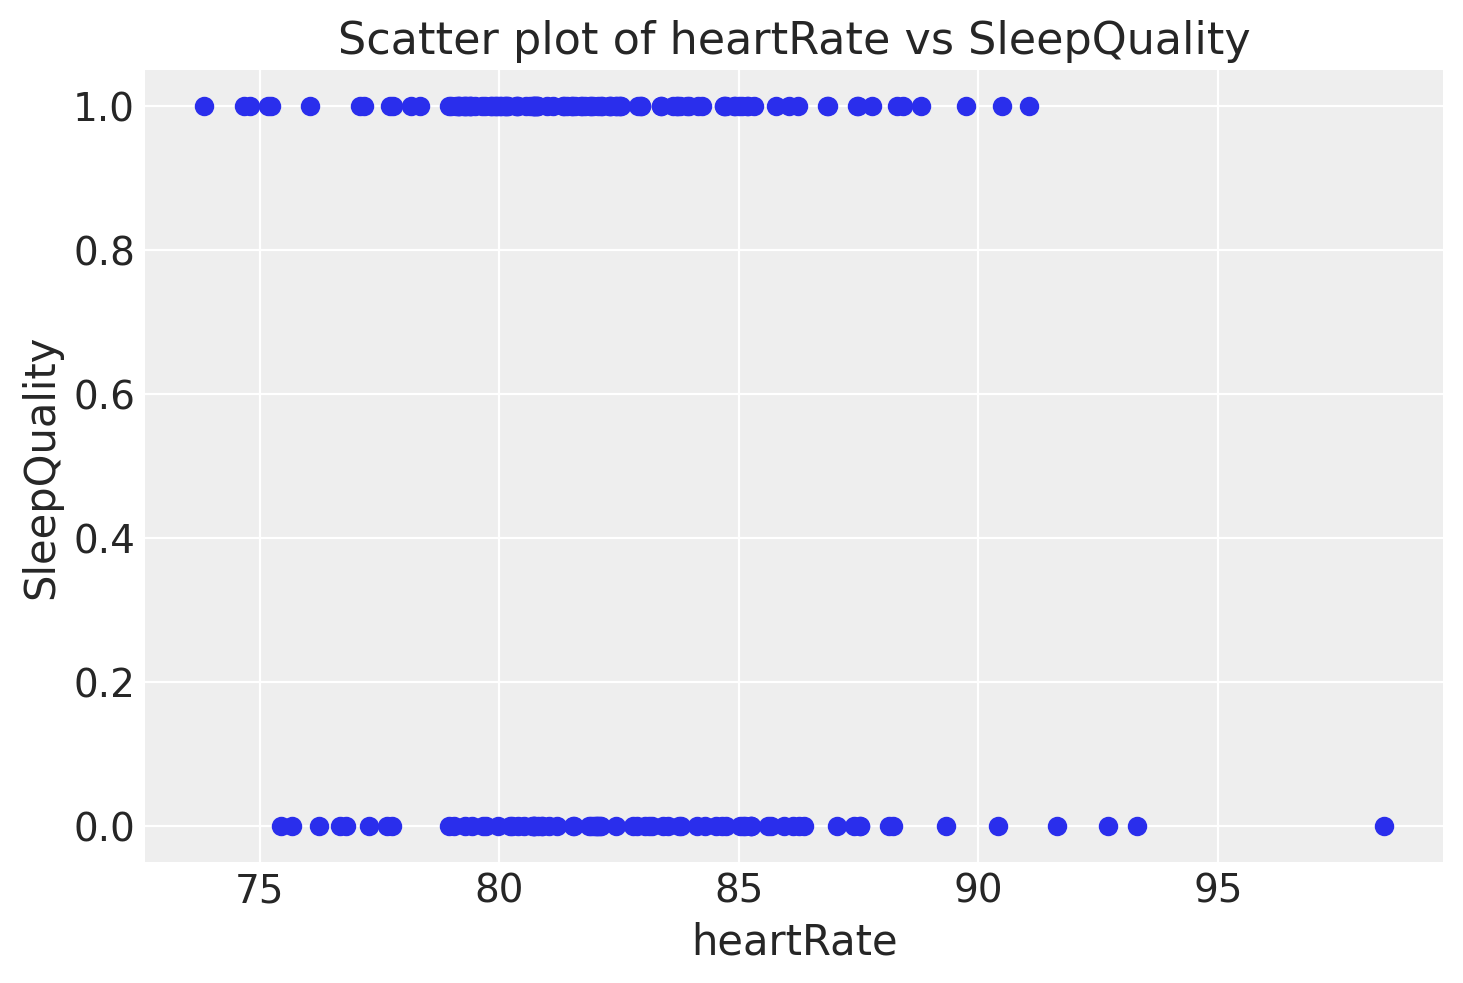

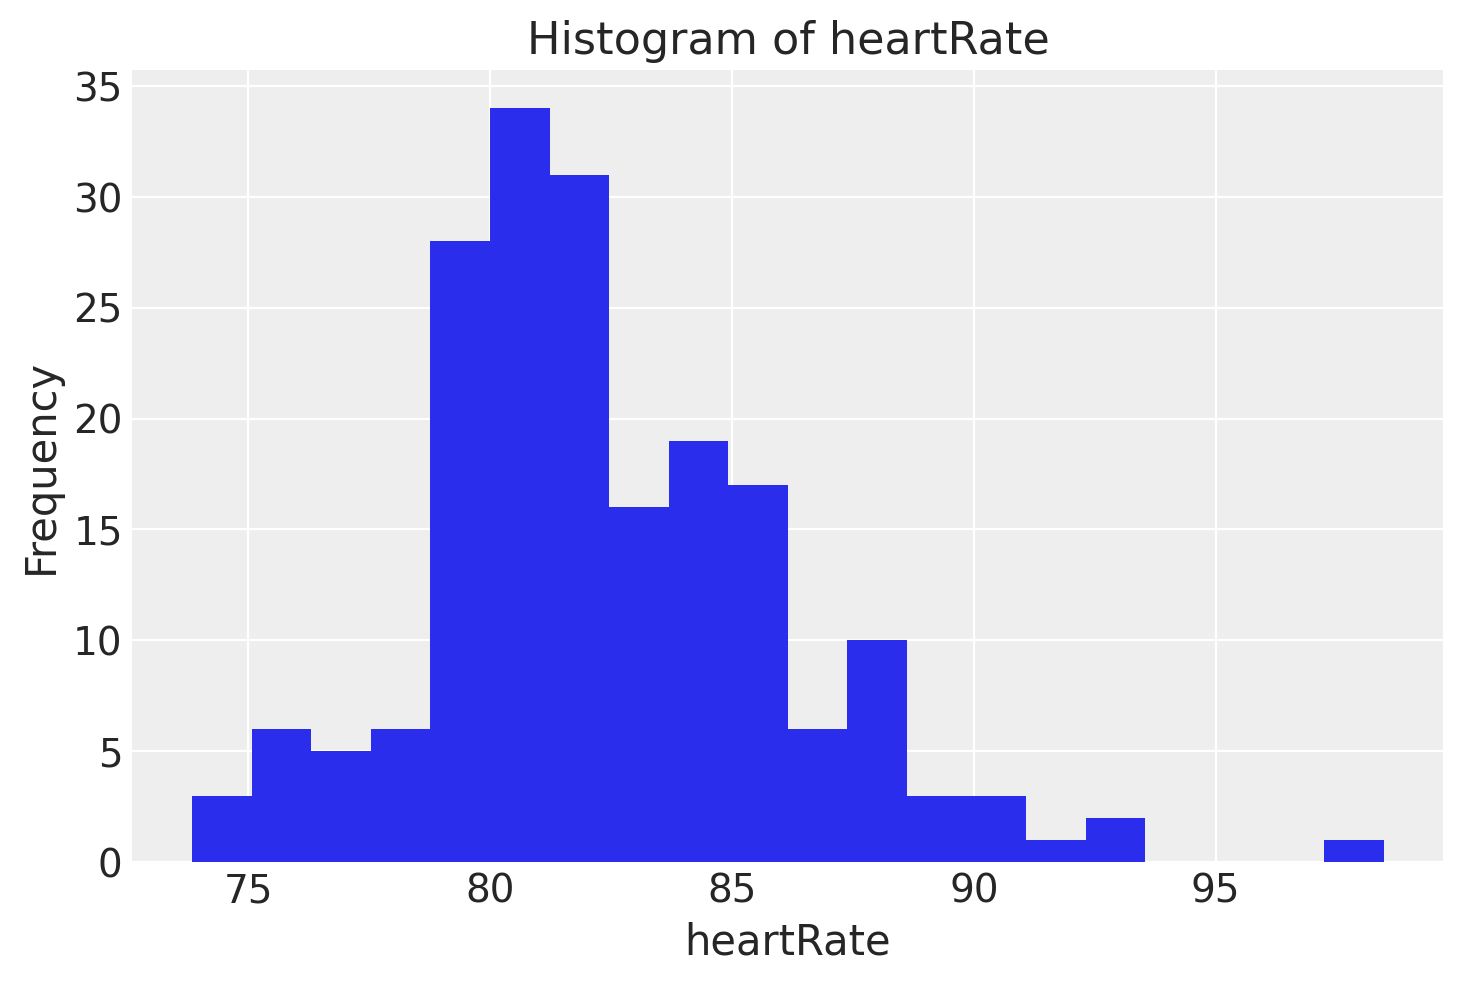

In [ ]:
# Scatter plot of heartRate vs SleepQuality
plt.scatter(data['heartRate'], data['SleepQuality'])
plt.xlabel('heartRate')
plt.ylabel('SleepQuality')
plt.title('Scatter plot of heartRate vs SleepQuality')
plt.show()

# Histogram of SleepQuality
plt.hist(data['heartRate'], bins=20)
plt.xlabel('heartRate')
plt.ylabel('Frequency')
plt.title('Histogram of heartRate')
plt.show()

# In this section models developed as μ = β0 + β1 * x and prior checks has been developed for mu=0 and sigma=1. In this model x represented by HeartRate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6935e2ad60>,
      dtype=object)

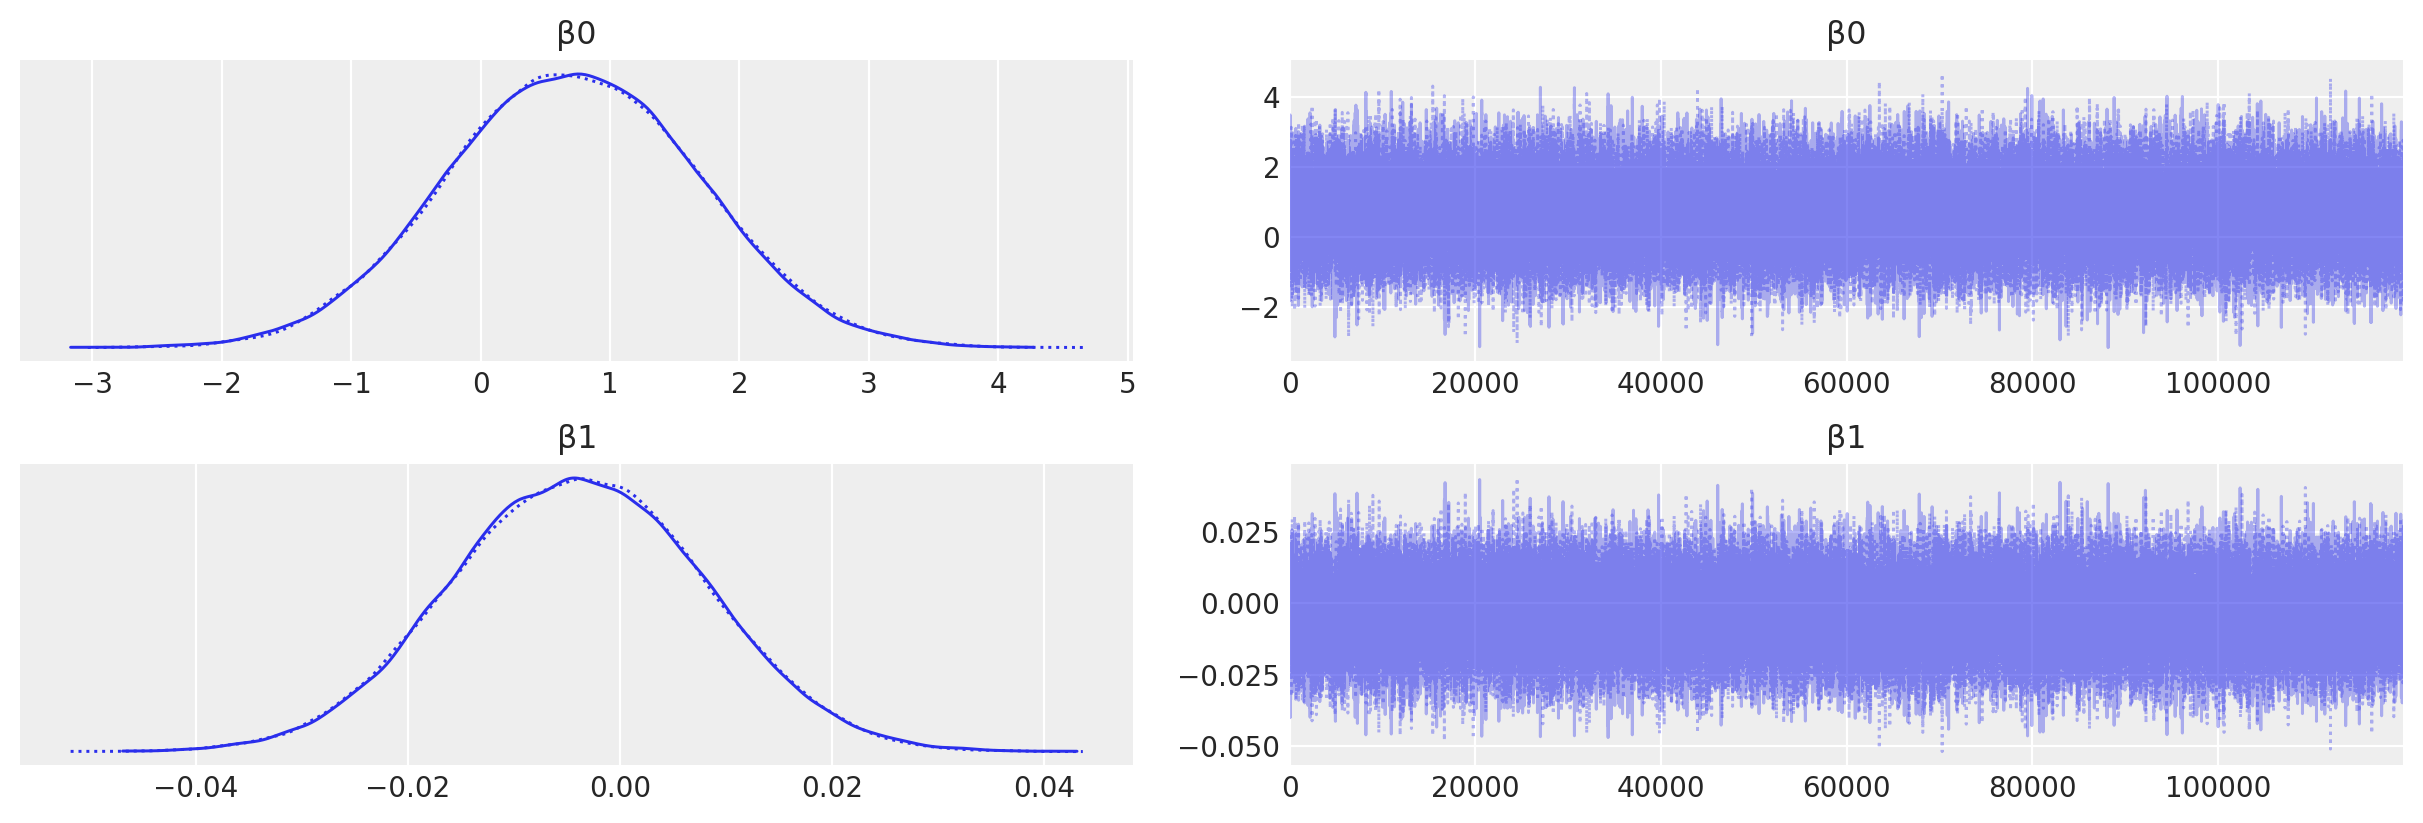

In [ ]:
coords = {"observation": data.index.values}

coords

with pm.Model(coords=coords) as binomial_regression_model:
    x = pm.Data("heartRate", data["heartRate"], dims="observation")
    # priors
    β0 = pm.Normal("β0", mu=0, sigma=1)
    β1 = pm.Normal("β1", mu=0, sigma=1)
    # linear model
    μ = β0 + β1 * x
    p = pm.Deterministic("p", pm.math.invlogit(μ), dims="observation")
    # likelihood
    pm.Binomial("y", n=1, p=p, observed=data["SleepQuality"], dims="observation")

#return_inferencedatabool, default=FalseWhether to return the trace as an arviz.InferenceData (True) object or a MultiTrace (False) Defaults to False, but we’ll switch to True in an upcoming release.
with binomial_regression_model:
   
    trace = pm.sample(120000, tune=100000, return_inferencedata=True)
    
az.plot_trace(trace, var_names=["β0", "β1"])

> # > According the above result , it can be clearly seen that prior checks does not give proper results. For  β1 result nearly zero  it means there is no relation but a very small percentages it negative but for β0 is not zero and we can say that there is a correlated noise for β0

> # > In other words sleepQuality parameters includes highly noise and there are several effects creates this noise. 






,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,0.707,0.973,-1.116,2.525,0.005,0.004,36917.0,43006.0,1.0
β1,-0.004,0.012,-0.027,0.018,0.000,0.000,36848.0,43181.0,1.0


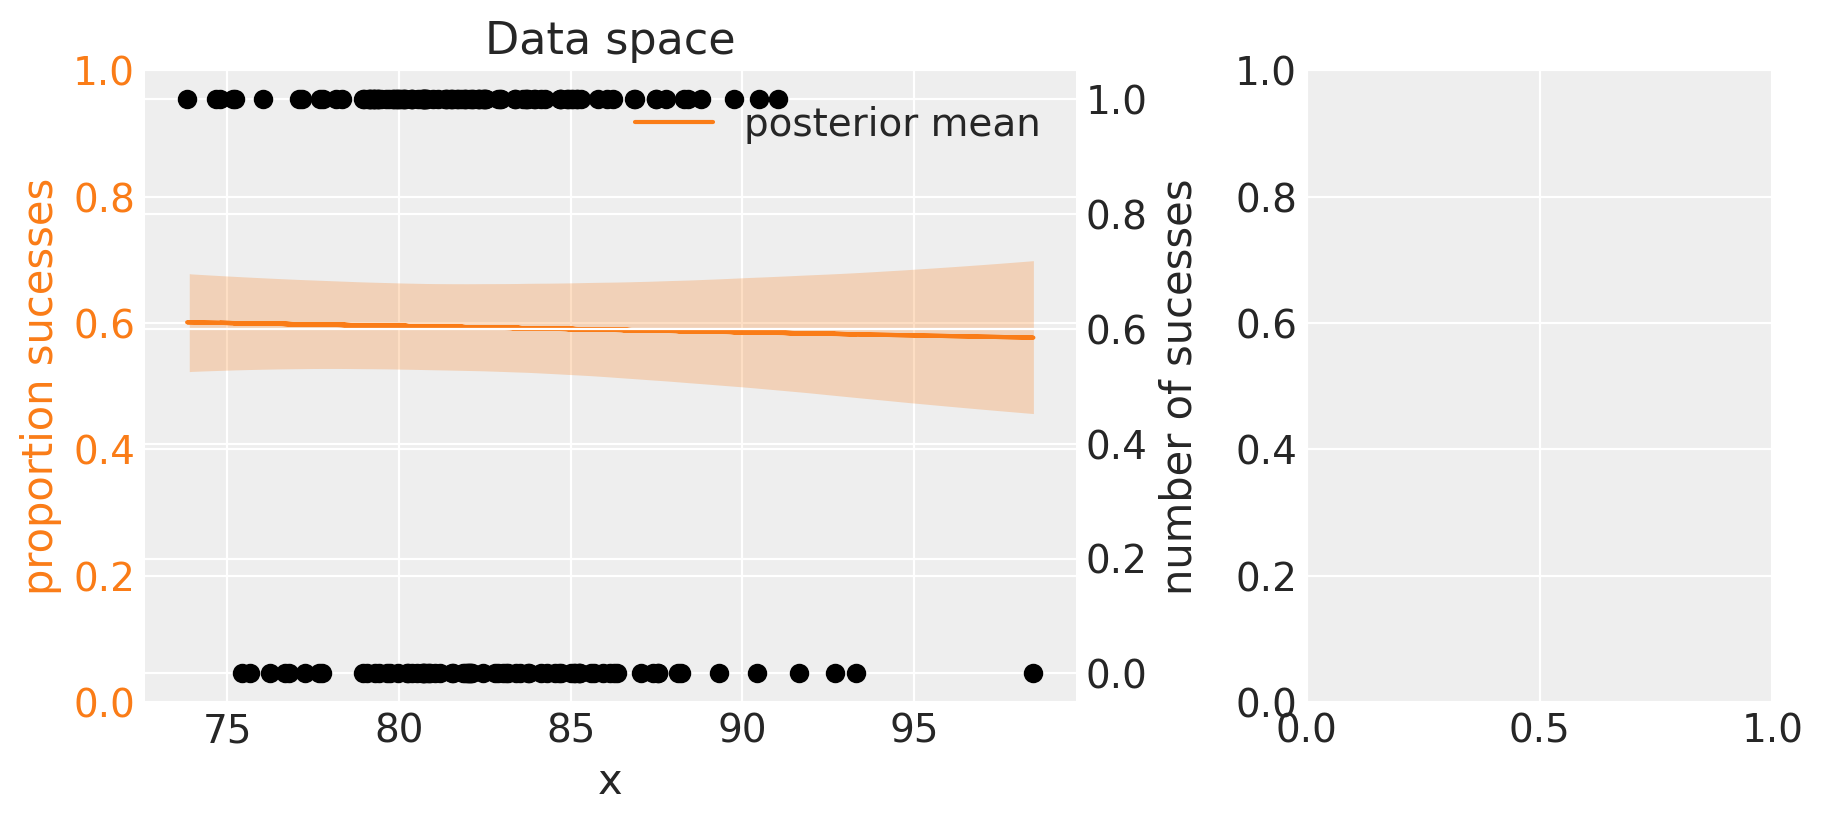

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={"width_ratios": [2, 1]})

# Data space plot ========================================================
az.plot_hdi(
    data["heartRate"],
    trace.posterior["p"],
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax[0],
    color="C1",
)
# posterior mean
post_mean = trace.posterior.stack(sample=("chain", "draw"))["p"].mean("sample")
ax[0].plot( data["heartRate"], post_mean, label="posterior mean", color="C1")
ax[0].set(ylim=[0,1])
ax[0].set(xlabel="x", title="Data space")
ax[0].set_ylabel("proportion sucesses", color="C1")
ax[0].tick_params(axis="y", labelcolor="C1")
ax[0].legend()
# instantiate a second axes that shares the same x-axis
freq = ax[0].twinx()
freq.set_ylabel("number of sucesses")
freq.scatter( data["heartRate"], data["SleepQuality"], color="k", label="data")

# Summarize the posterior distributions of the parameters
az.summary(trace, var_names=["β0", "β1"])

# > Above the metrics and model compared to the previous table( Which indicated that steps and SleepQuality) and posterior distrubions, the coefficients in this table have much lower uncertainty, as indicated by the smaller standard deviations and narrower HDI intervals. Additionally, the r_hat values for both coefficients are close to 1, indicating that the chains have likely converged well. The effective sample size (ESS) for both coefficients is also high, which is a good sign that the model is well-sampled.

# > There are some reason for that. First of all mean of HearRate has been used for the input. This assumption is not proper because literature and in the real life shows that heart rate distribution in other words changing of this trend daily is more important also in literature we know that there is a different distributions which name is heartRate distributions. In future work, daily heartRate can be investigated and trend analyses can be analyzed.







> # > MODEL 3 

# > In this model daily burned calories and SleepQaulity investigated. It can be seen that from below graph calories and SleepQuality data.





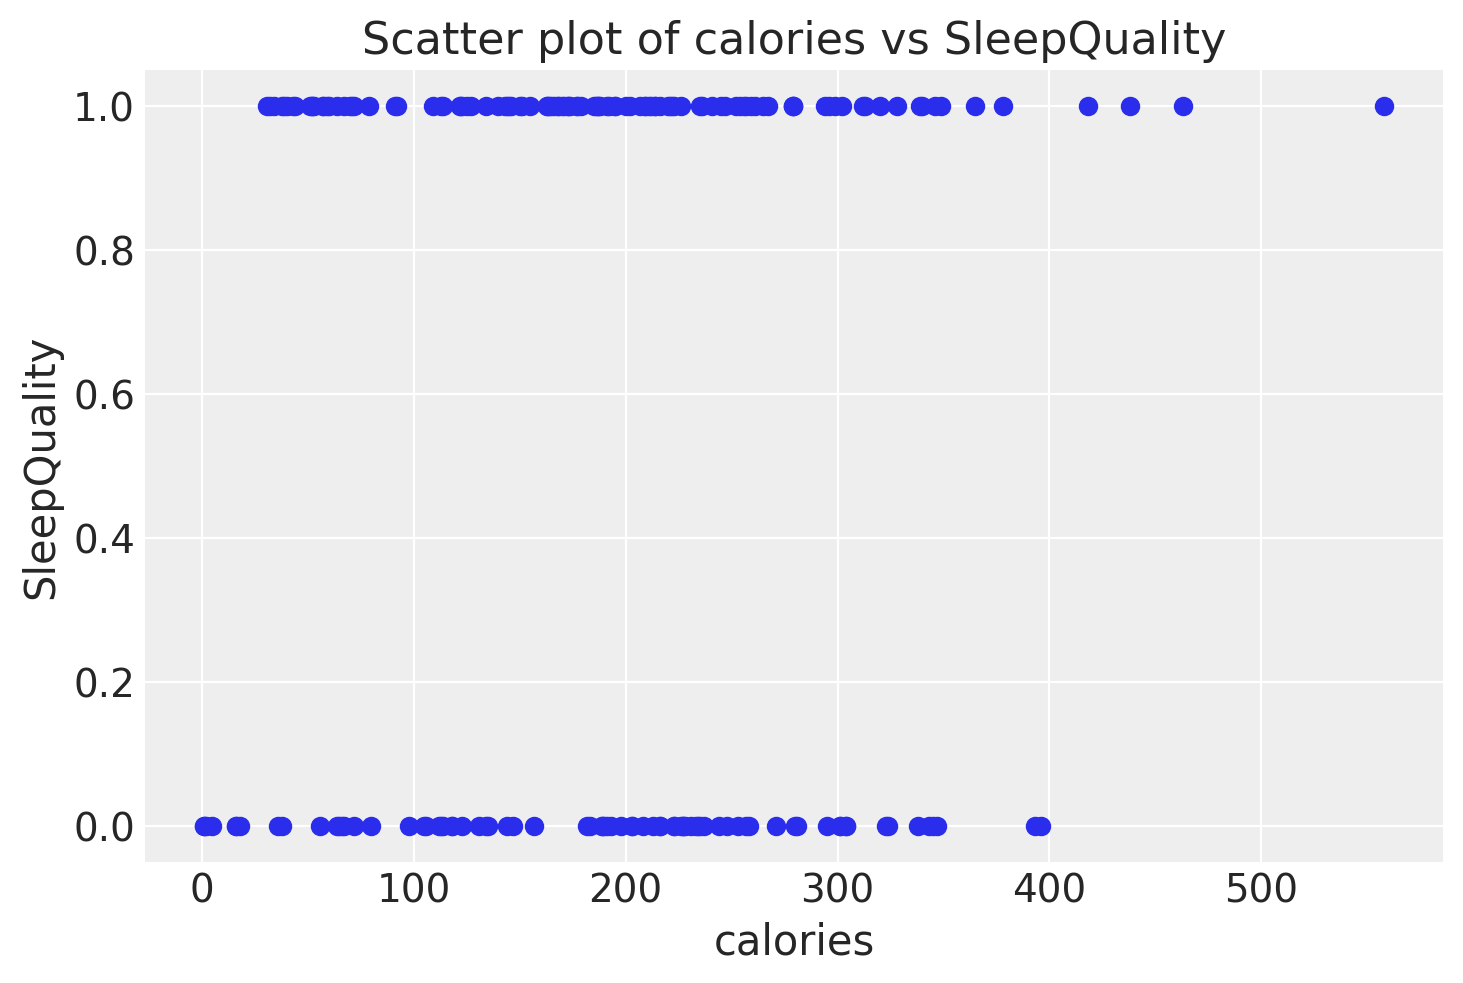

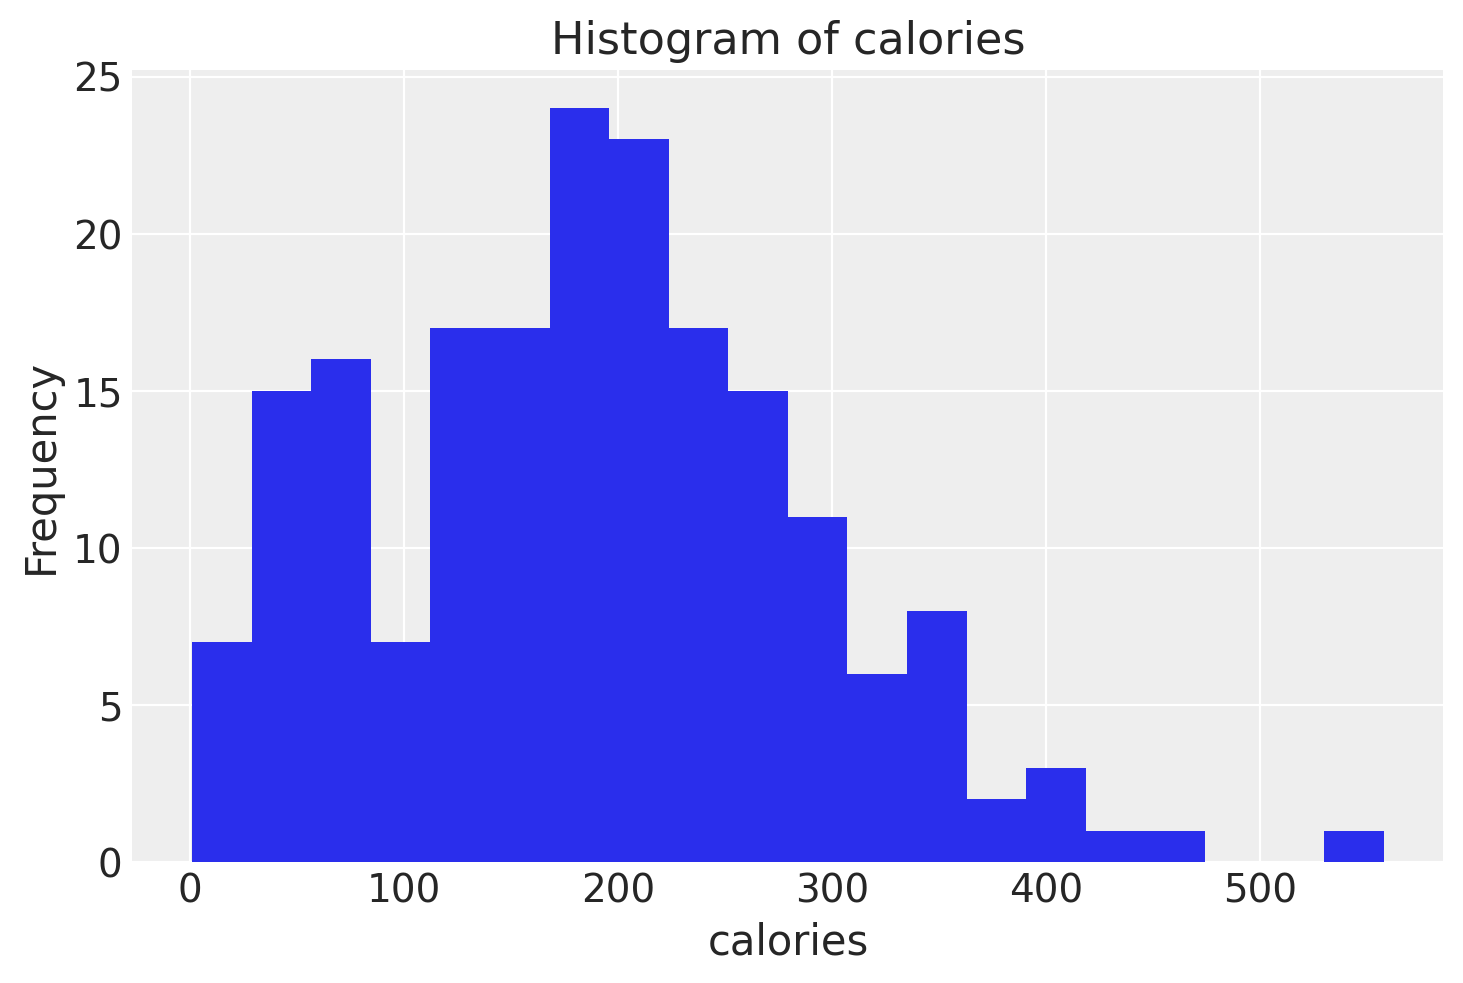

In [ ]:
# Scatter plot of calories vs SleepQuality
plt.scatter(data['calories'], data['SleepQuality'])
plt.xlabel('calories')
plt.ylabel('SleepQuality')
plt.title('Scatter plot of calories vs SleepQuality')
plt.show()

# Histogram of SleepQuality
plt.hist(data['calories'], bins=20)
plt.xlabel('calories')
plt.ylabel('Frequency')
plt.title('Histogram of calories')
plt.show()


# In this section as same as for previous models mu=0, sigma=1. For likelihood Binomial distrubution has been used and trace according to below paramaters. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6935f534f0>,
      dtype=object)

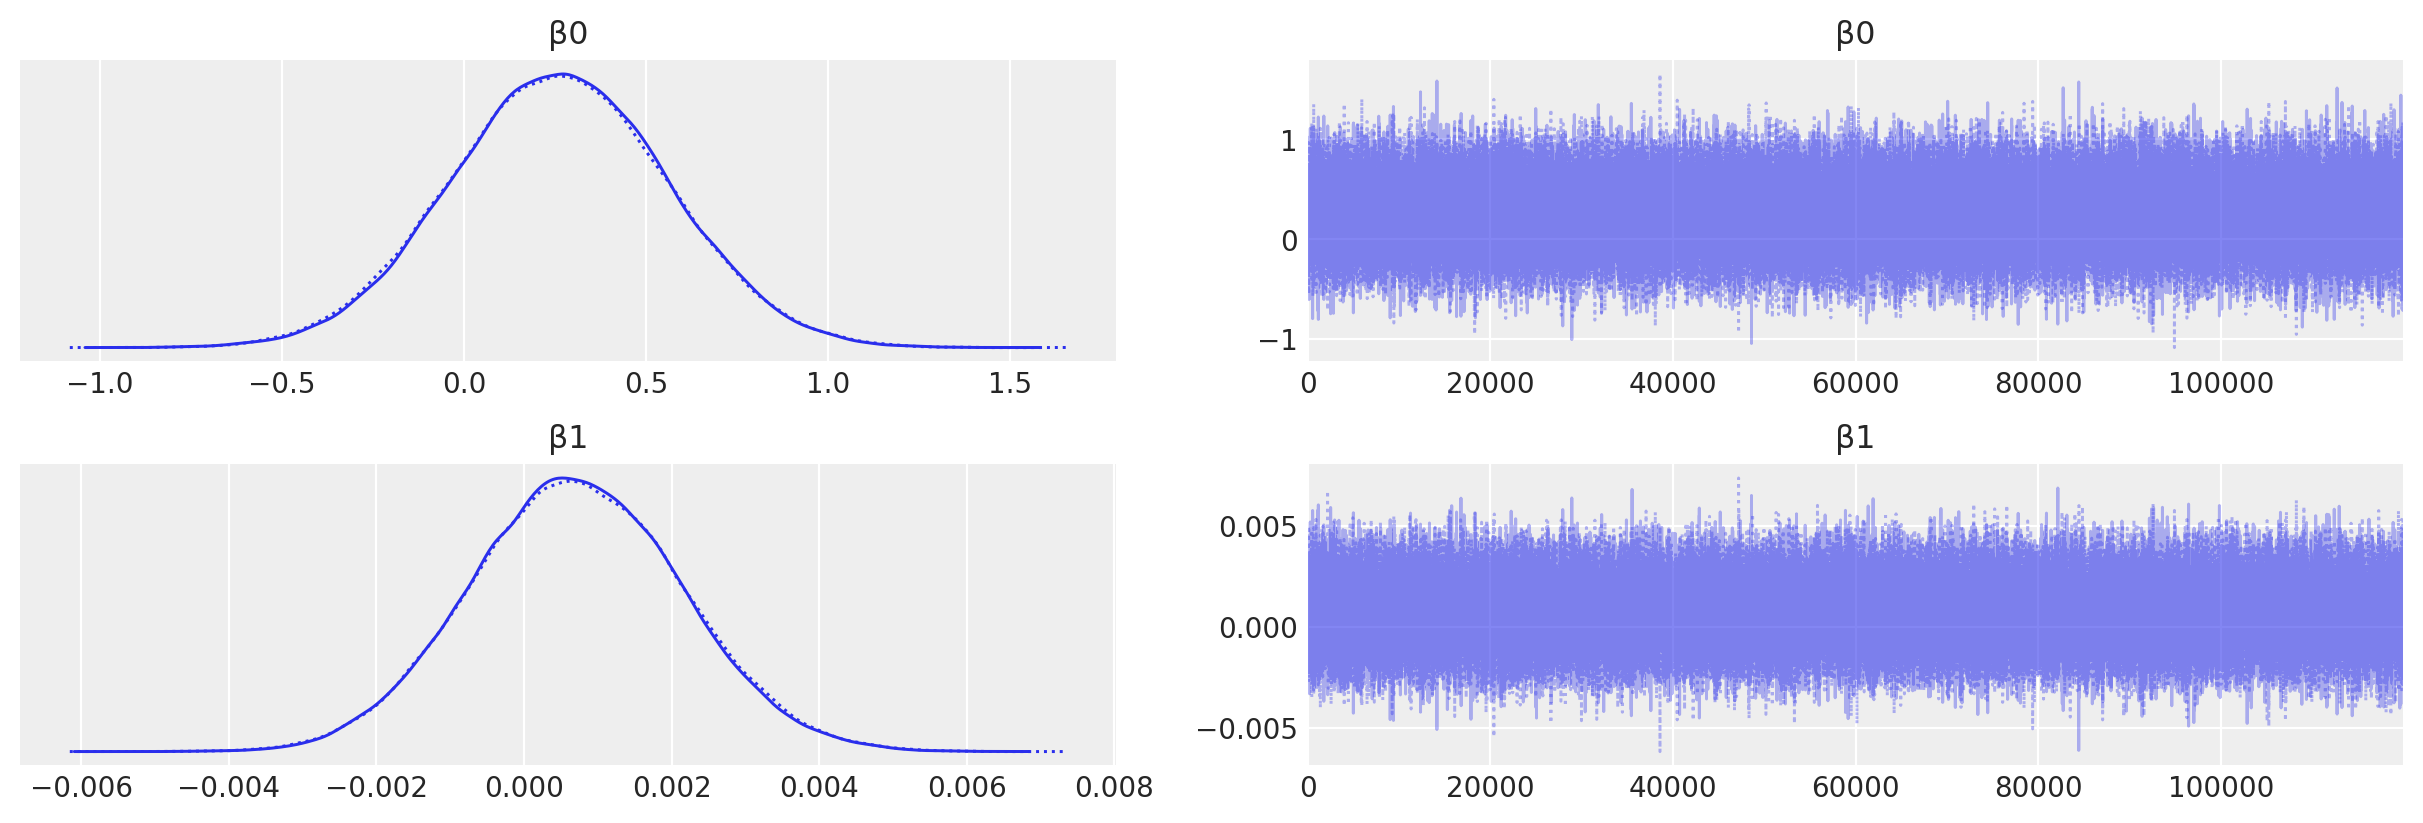

In [ ]:
oords = {"observation": data.index.values}

coords

coords = {"observation": data.index.values}
with pm.Model(coords=coords) as binomial_regression_model:
    x = pm.Data("calories", data["calories"], dims="observation")
    # priors
    β0 = pm.Normal("β0", mu=0, sigma=1)
    β1 = pm.Normal("β1", mu=0, sigma=1)
    # linear model
    μ = β0 + β1 * x
    p = pm.Deterministic("p", pm.math.invlogit(μ), dims="observation")
    # likelihood
    pm.Binomial("y", n=1, p=p, observed=data["SleepQuality"], dims="observation")

#return_inferencedatabool, default=FalseWhether to return the trace as an arviz.InferenceData (True) object or a MultiTrace (False) Defaults to False, but we’ll switch to True in an upcoming release.
with binomial_regression_model:
   
    trace = pm.sample(120000, tune=100000, return_inferencedata=True)
    
az.plot_trace(trace, var_names=["β0", "β1"])

# > According to above result best prior check has been observed in this model. β1 is still nearly zero it means this not fit properly but the small percentage is positive compared to heartRate. There are still noise in β0 data.

# > Compared to Model 1 and Model 2 , The Model 3 seem to most approprirote but this does not means model is fit properly. 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,0.259,0.300,-0.313,0.815,0.001,0.001,55717.0,69456.0,1.0
β1,0.001,0.001,-0.002,0.003,0.000,0.000,55908.0,70934.0,1.0


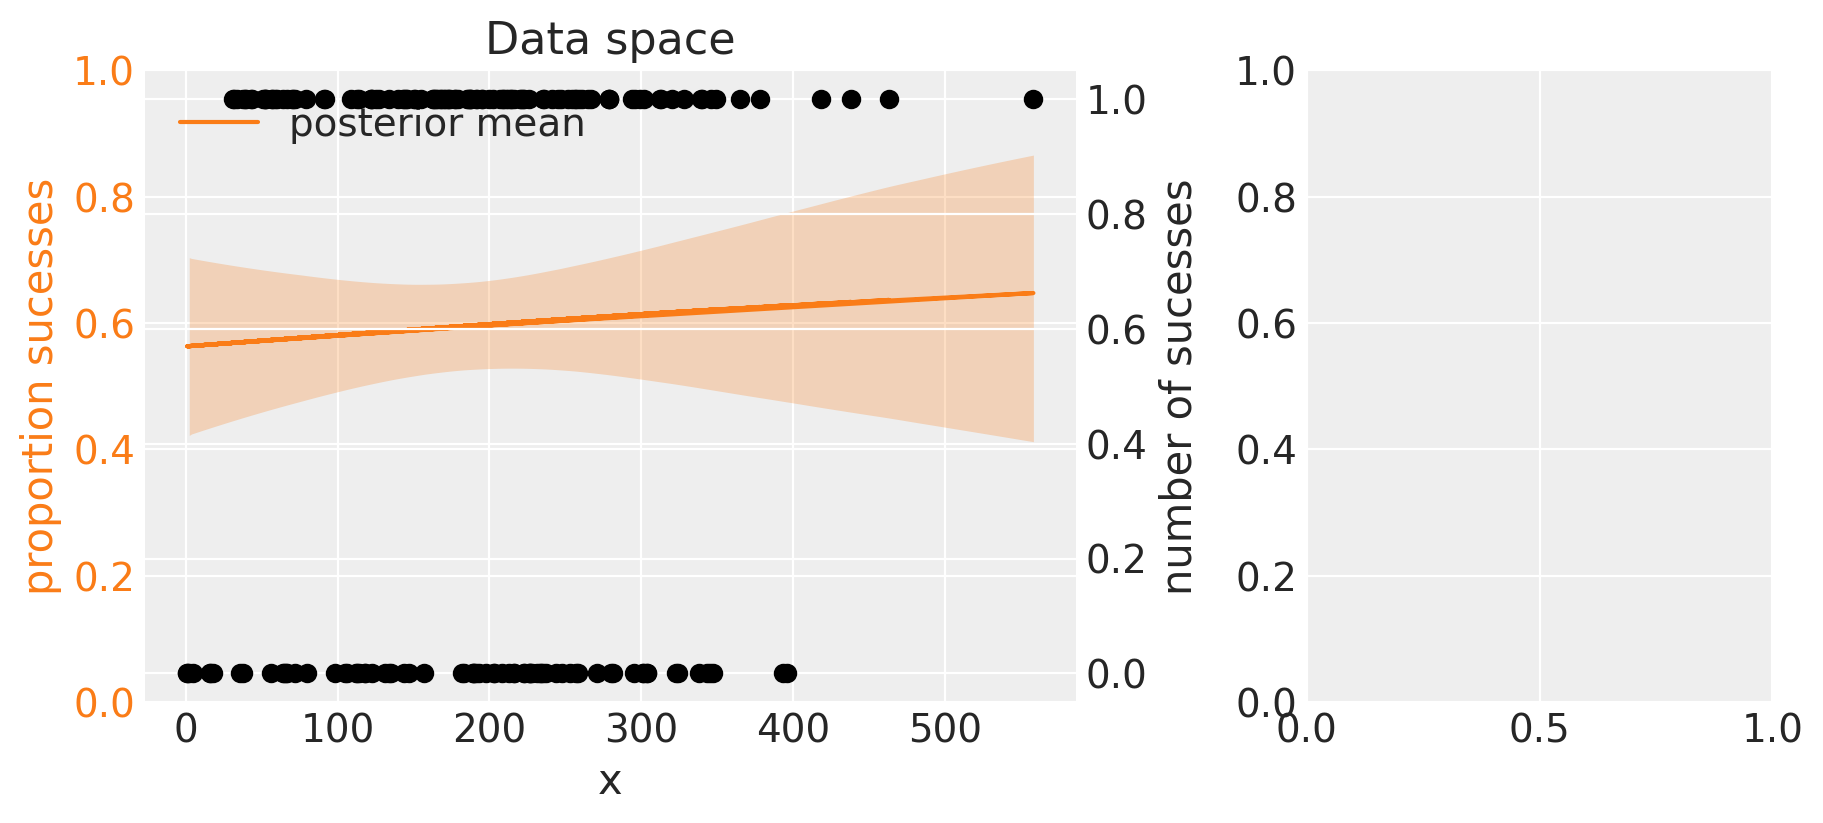

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={"width_ratios": [2, 1]})

# Data space plot ========================================================
az.plot_hdi(
    data["calories"],
    trace.posterior["p"],
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax[0],
    color="C1",
)
# posterior mean
post_mean = trace.posterior.stack(sample=("chain", "draw"))["p"].mean("sample")
ax[0].plot( data["calories"], post_mean, label="posterior mean", color="C1")
ax[0].set(ylim=[0,1])
ax[0].set(xlabel="x", title="Data space")
ax[0].set_ylabel("proportion sucesses", color="C1")
ax[0].tick_params(axis="y", labelcolor="C1")
ax[0].legend()
# instantiate a second axes that shares the same x-axis
freq = ax[0].twinx()
freq.set_ylabel("number of sucesses")
freq.scatter( data["calories"], data["SleepQuality"], color="k", label="data")

# Summarize the posterior distributions of the parameters
az.summary(trace, var_names=["β0", "β1"])


# >Comparing the Model-1 to the Model-2 and Model-3, it appears that the first table has much higher uncertainty in the estimated coefficients than the second and third tables. This is indicated by the larger standard deviations and wider HDI intervals for the coefficients in the first table. The r_hat values in the first table are also greater than 1, indicating that the chains did not converge well.

# >The second model also has lower uncertainty than the first table but much higher uncertainty than the third model. The r_hat values in the second model are close to 1 and the ESS values are high, which is a good sign that the model is well-sampled.

# >The third model has the lowest uncertainty among the three tables, as indicated by the small standard deviations and narrow HDI intervals for the coefficients. The r_hat values are also close to 1, indicating that the chains have likely converged well and ESS values are high.

# >Overall, the third model appears to have the best fit to the data of the three tables.

# > According to results SleepQuality can be best explained with burned caloires. This results is not surprising because calories data is not real calories. The calories data calculates by watch with resprect to steps, heart rate , weight etc. So that reason calories data includes so many data internally. 

# > In this Model 4 different perpective has been invetigated. The steps and shallowSleepTime has been analyzed and it can be seen from below graphs. 

# > shallowSleepTime represents to how many minutes shallows sleep during night. Step is total number of step during the day until night.
# >  Model 4

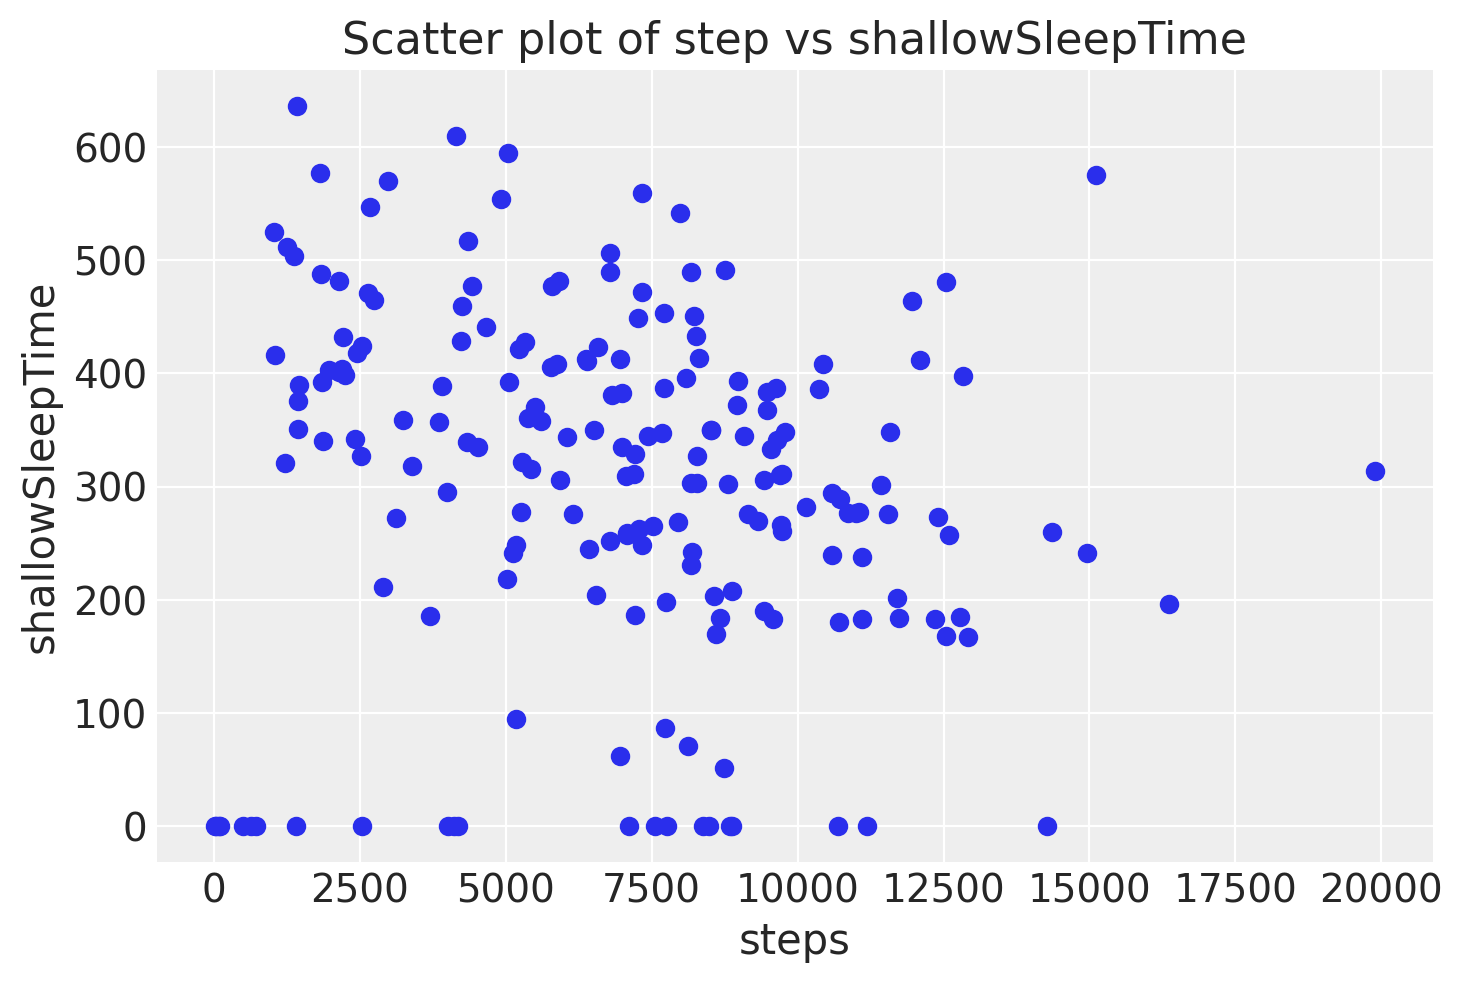

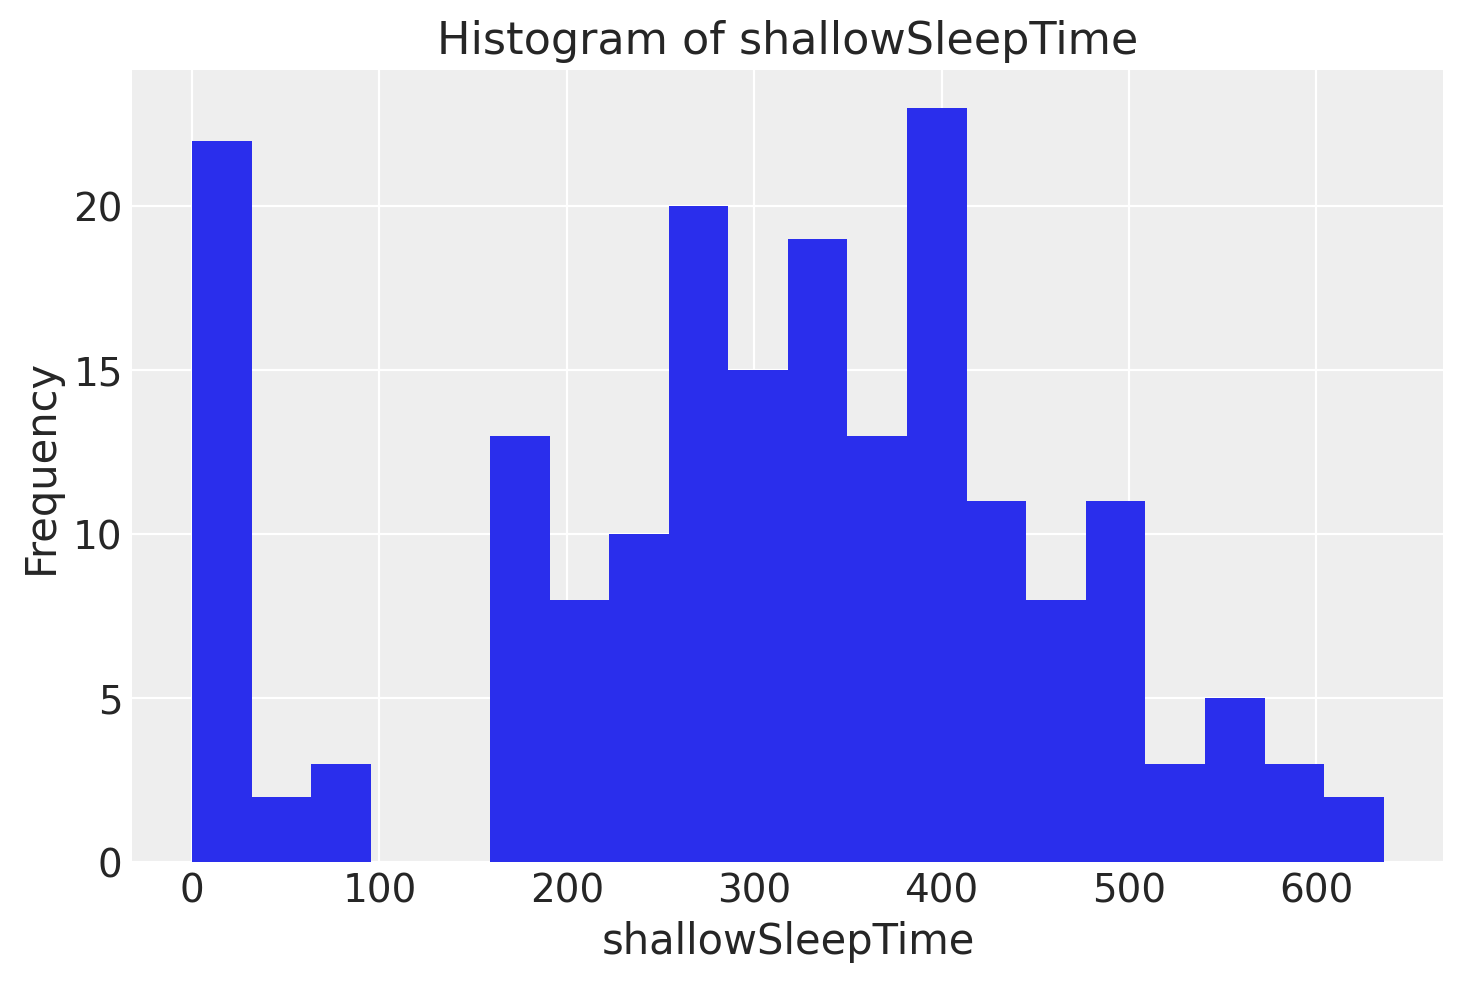

In [ ]:
# Plotting the data as a scatter plot
plt.scatter(data['steps'], data['shallowSleepTime'])
plt.xlabel('steps')
plt.ylabel('shallowSleepTime')
plt.title('Scatter plot of step vs shallowSleepTime')
plt.show()

# Plotting the data as a histogram
plt.hist(data['shallowSleepTime'], bins=20)
plt.xlabel('shallowSleepTime')
plt.ylabel('Frequency')
plt.title('Histogram of shallowSleepTime')
plt.show()


# > In this model Shallow Sleep time is modelled by number of steps.

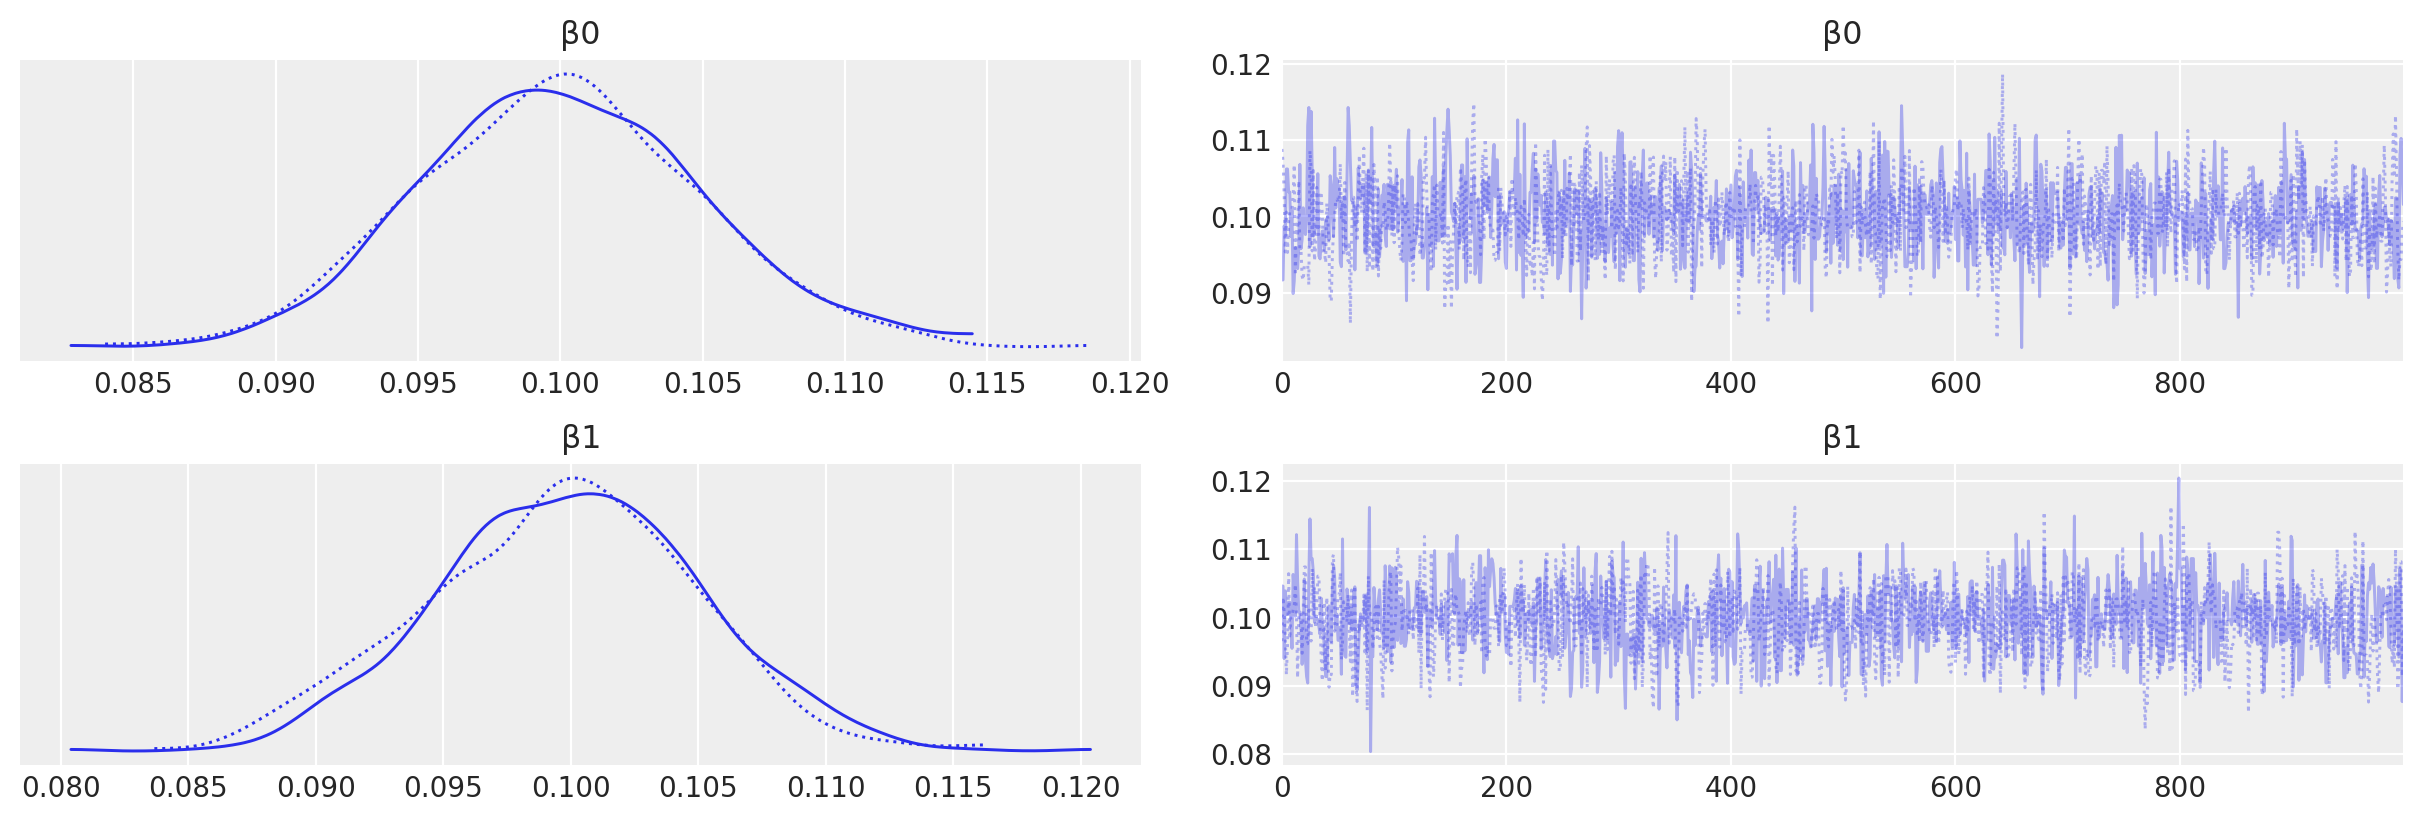

In [ ]:
coords = {"observation": data.index.values}
n = data.shape[0]
with pm.Model(coords=coords) as binomial_regression_model:
    steps = pm.Data("steps", data["steps"], dims="observation")
    # priors
    β0 = pm.Normal("β0", mu=0.1, sigma=0.005)
    β1 = pm.Normal("β1", mu=0.1, sigma=0.005)
    # linear model
    μ = β0 + β1 * steps
    p = pm.Deterministic("p", pm.math.invlogit(μ), dims="observation")
    # likelihood
    pm.Normal("shallowSleepTime", mu=p, sigma=1, observed=data["shallowSleepTime"])

    trace = pm.sample(1000, tune=2000, return_inferencedata=True)

az.plot_trace(trace, var_names=["β0", "β1"]);

# > It can be seen that from graph the "β0", "β1" is nearly zero but not zero :).There is a effect regarding to prior checks. 

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


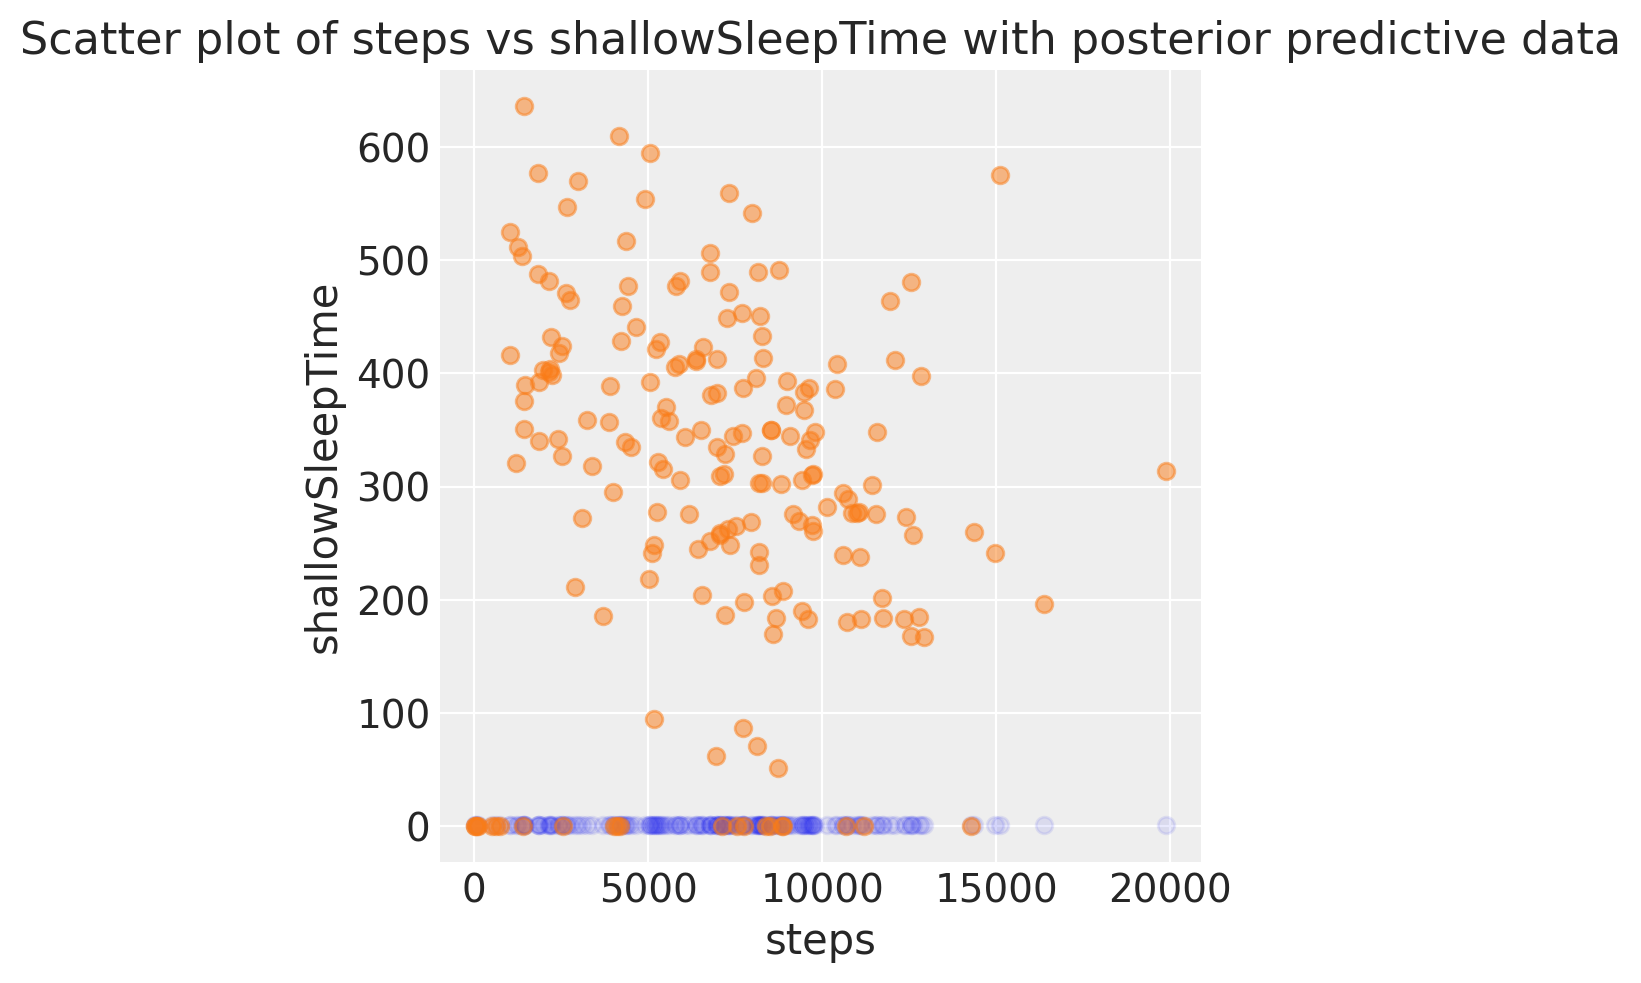

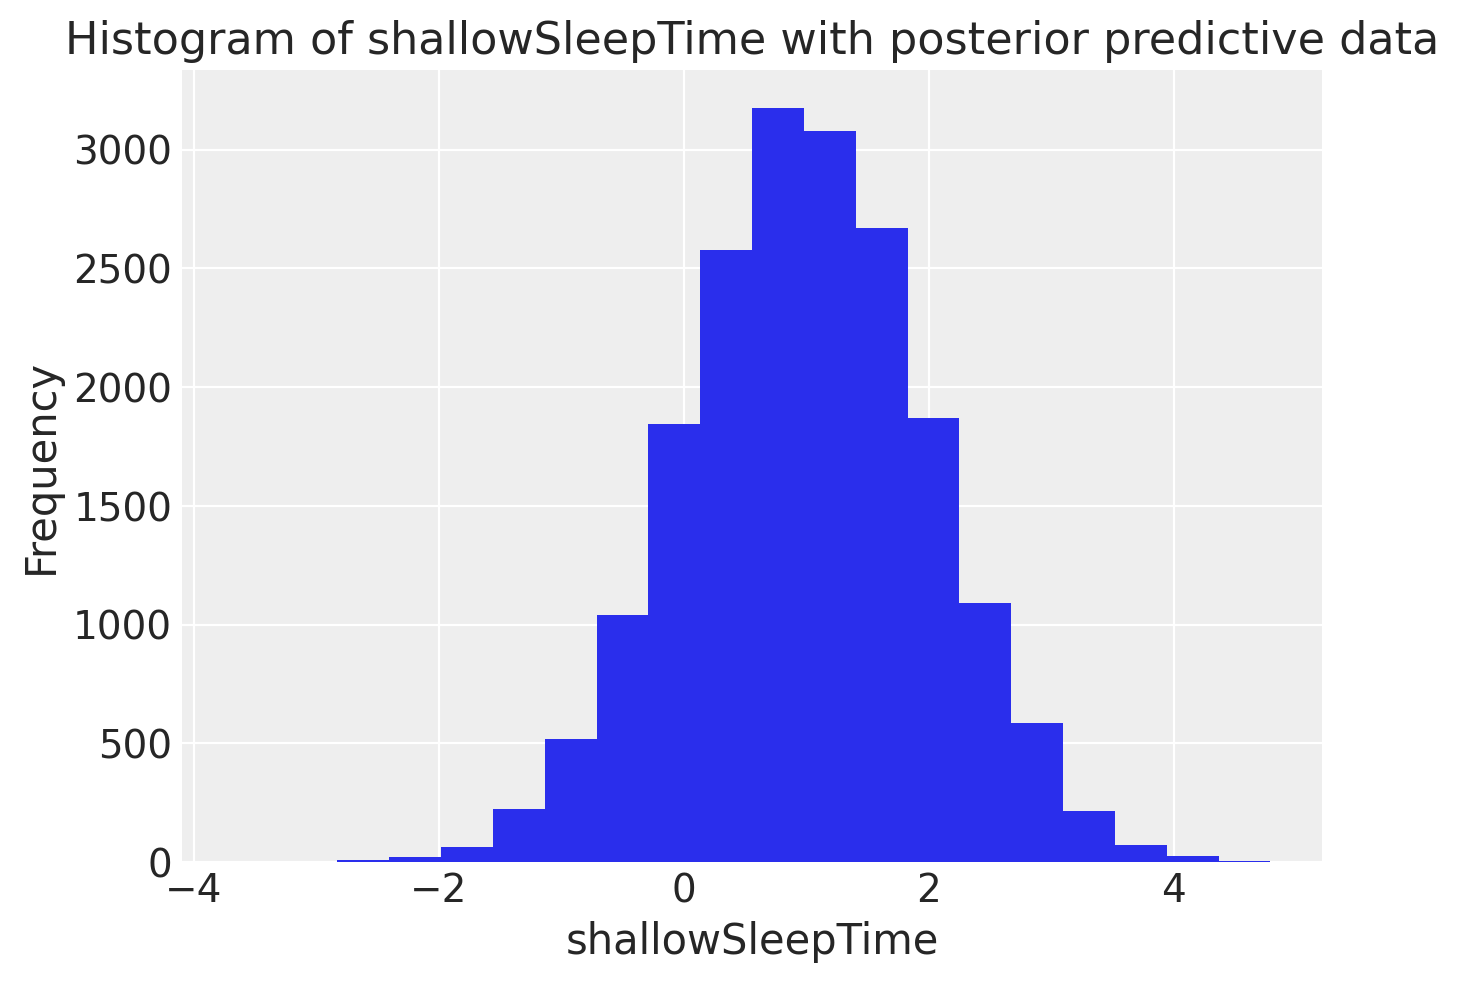

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,0.1,0.005,0.091,0.109,0.0,0.0,1693.0,1526.0,1.0
β1,0.1,0.005,0.089,0.109,0.0,0.0,1582.0,1369.0,1.0


In [ ]:
# Perform posterior predictive checks
ppc = pm.sample_posterior_predictive(trace, model=binomial_regression_model, samples=100)

# Create a scatter plot of the posterior predictive data
plt.scatter(data['steps'], ppc['shallowSleepTime'].mean(axis=0), alpha=0.1)
plt.scatter(data['steps'], data['shallowSleepTime'], alpha=0.5)
plt.xlabel('steps')
plt.ylabel('shallowSleepTime')
plt.title('Scatter plot of steps vs shallowSleepTime with posterior predictive data')
plt.show()

# Create a histogram of the posterior predictive data
plt.hist(ppc['shallowSleepTime'].flatten(), bins=20)
plt.xlabel('shallowSleepTime')
plt.ylabel('Frequency')
plt.title('Histogram of shallowSleepTime with posterior predictive data')
plt.show()

# Summarize the posterior distributions of the parameters
az.summary(trace, var_names=["β0", "β1"])


# > In this posterior checks and summary results , the models does not fit properly but we can only small percentage of data can be expressed via steps. In others words there are so many different factor which affected the shallowSleepTime rather than number of step. 

# > Finally, Model 5 has been developed the steps and deepSleepTime.

# > deepSleepTime represents to how many minutes deeply sleept during night. Step is total number of step during the day until night.

# > Model 5 

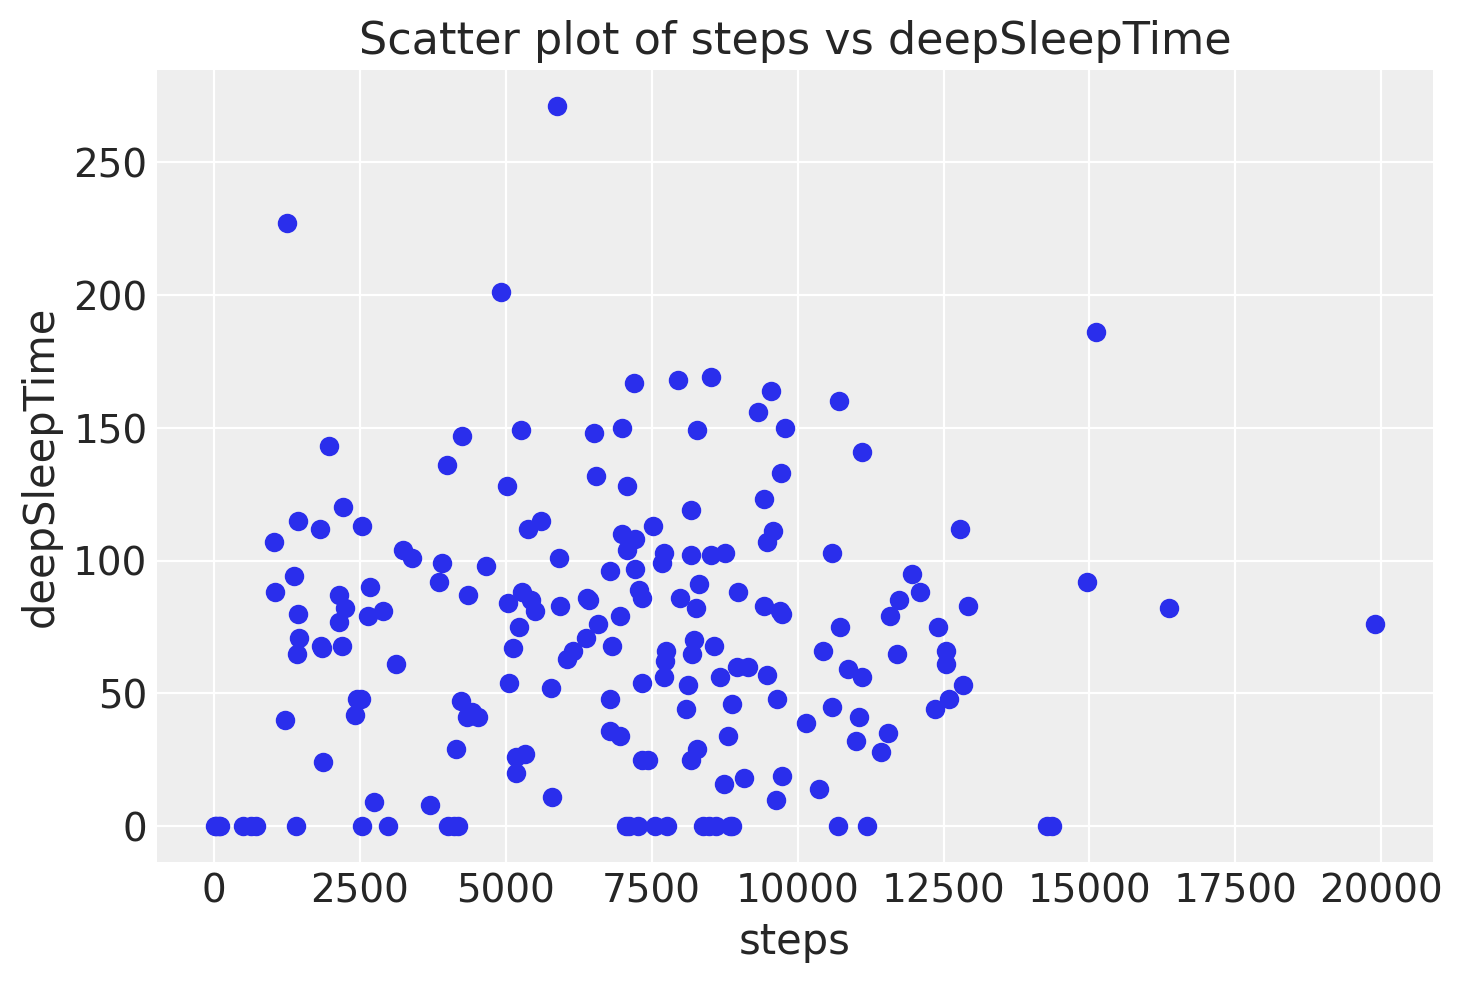

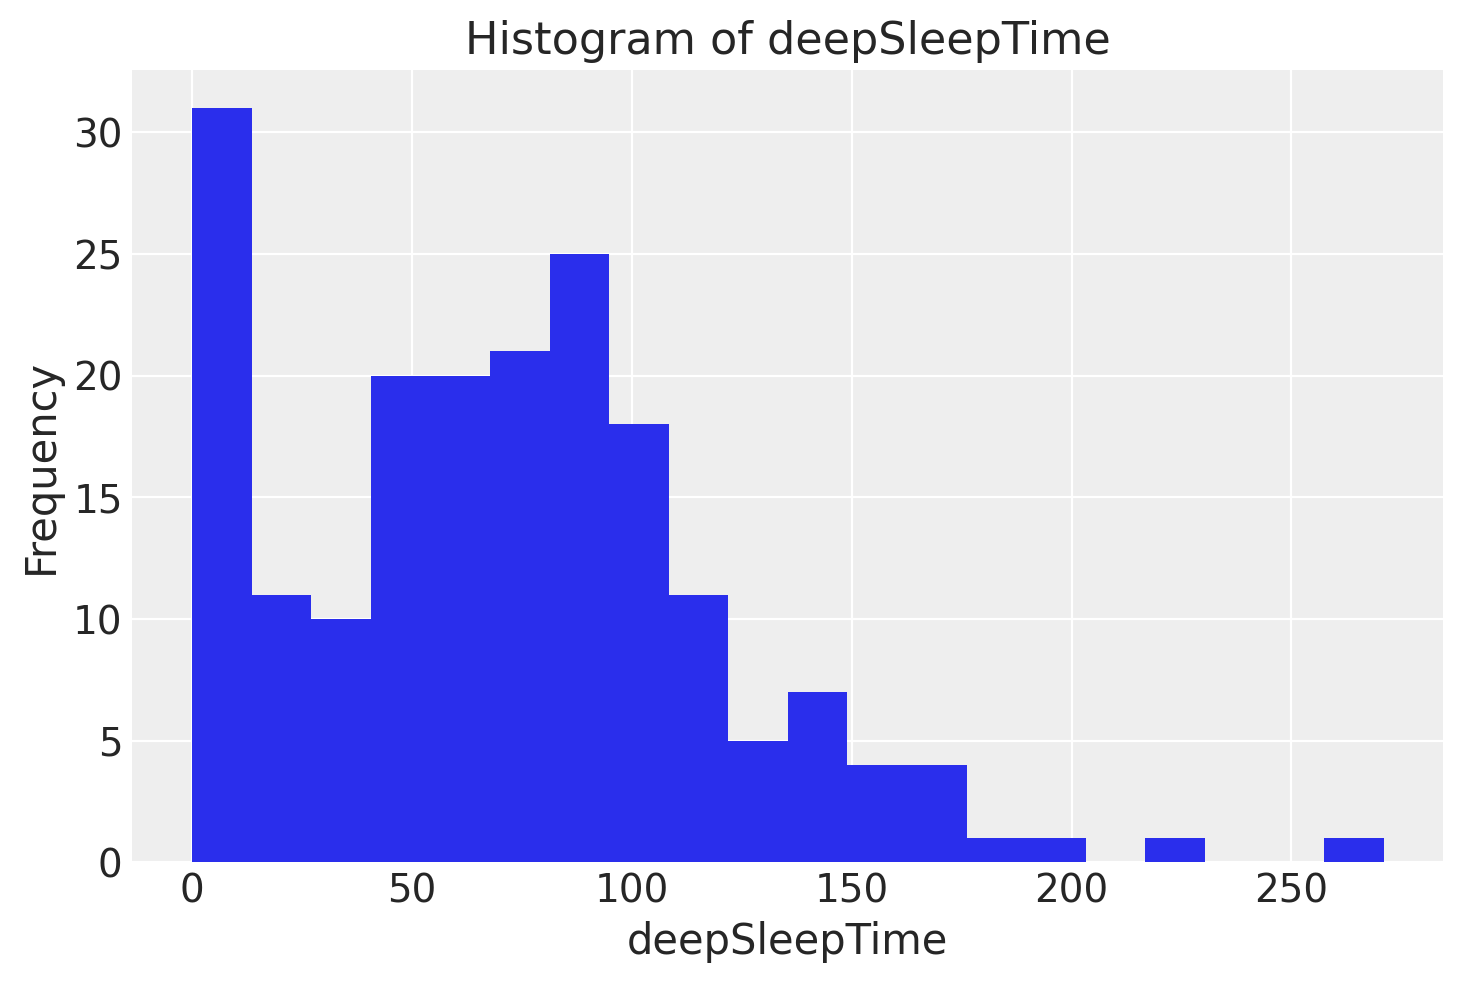

In [ ]:
# Plotting the data as a scatter plot
plt.scatter(data['steps'], data['deepSleepTime'])
plt.xlabel('steps')
plt.ylabel('deepSleepTime')
plt.title('Scatter plot of steps vs deepSleepTime')
plt.show()

# Plotting the data as a histogram
plt.hist(data['deepSleepTime'], bins=20)
plt.xlabel('deepSleepTime')
plt.ylabel('Frequency')
plt.title('Histogram of deepSleepTime')
plt.show()


# > In this model deepSleepTime is modelled by number of steps.

# > mu=0.1, sigma=0.005

# > Prior checks shows that there are highly uncertanity noise for β0 and β1. There are some reason for that. First of all , the data is not enough for model. Secondly, the data and correlation is enough for model explanation secondly some extremely data make distorsions for the data. 

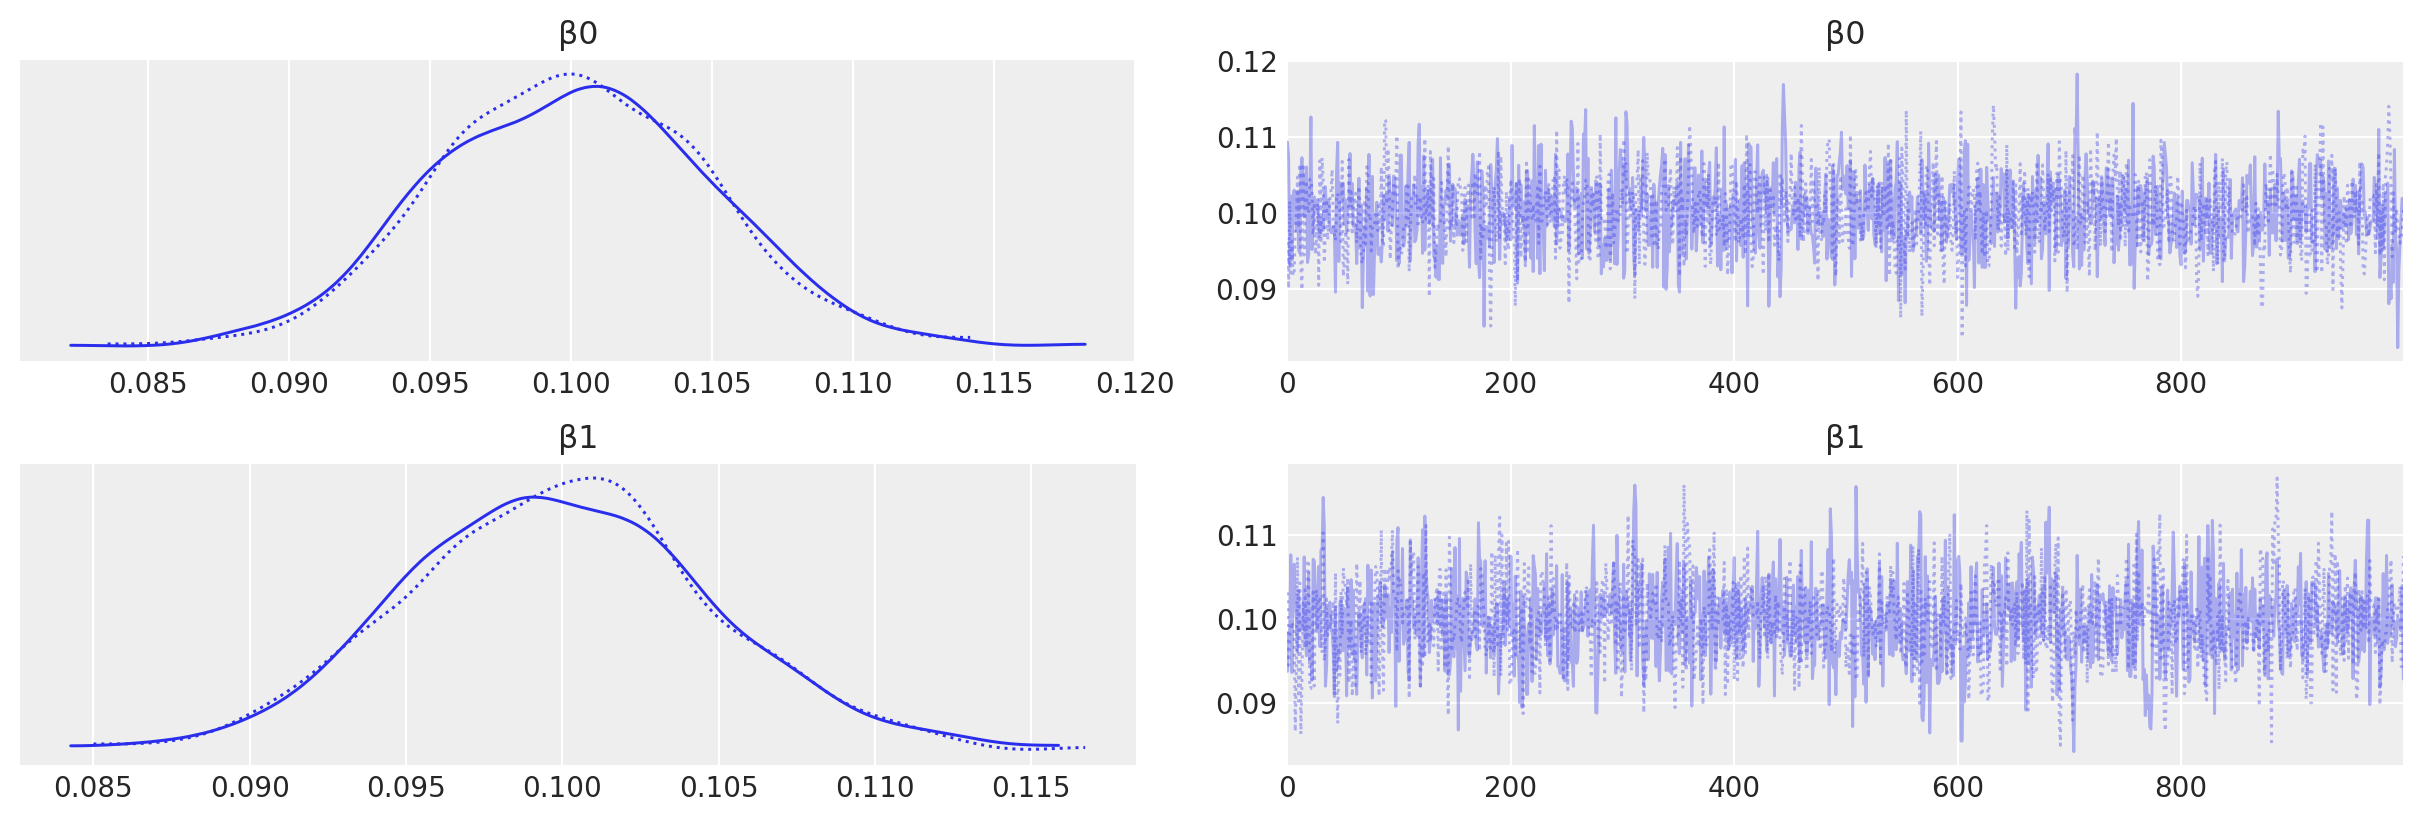

In [ ]:
coords = {"observation": data.index.values}
n = data.shape[0]
with pm.Model(coords=coords) as binomial_regression_model:
    steps = pm.Data("steps", data["steps"], dims="observation")
    # priors
    β0 = pm.Normal("β0", mu=0.1, sigma=0.005)
    β1 = pm.Normal("β1", mu=0.1, sigma=0.005)
    # linear model
    μ = β0 + β1 * steps
    p = pm.Deterministic("p", pm.math.invlogit(μ), dims="observation")
    # likelihood
    pm.Normal("deepSleepTime", mu=p, sigma=1, observed=data["deepSleepTime"])

    trace = pm.sample(1000, tune=2000, return_inferencedata=True)

az.plot_trace(trace, var_names=["β0", "β1"]);


/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


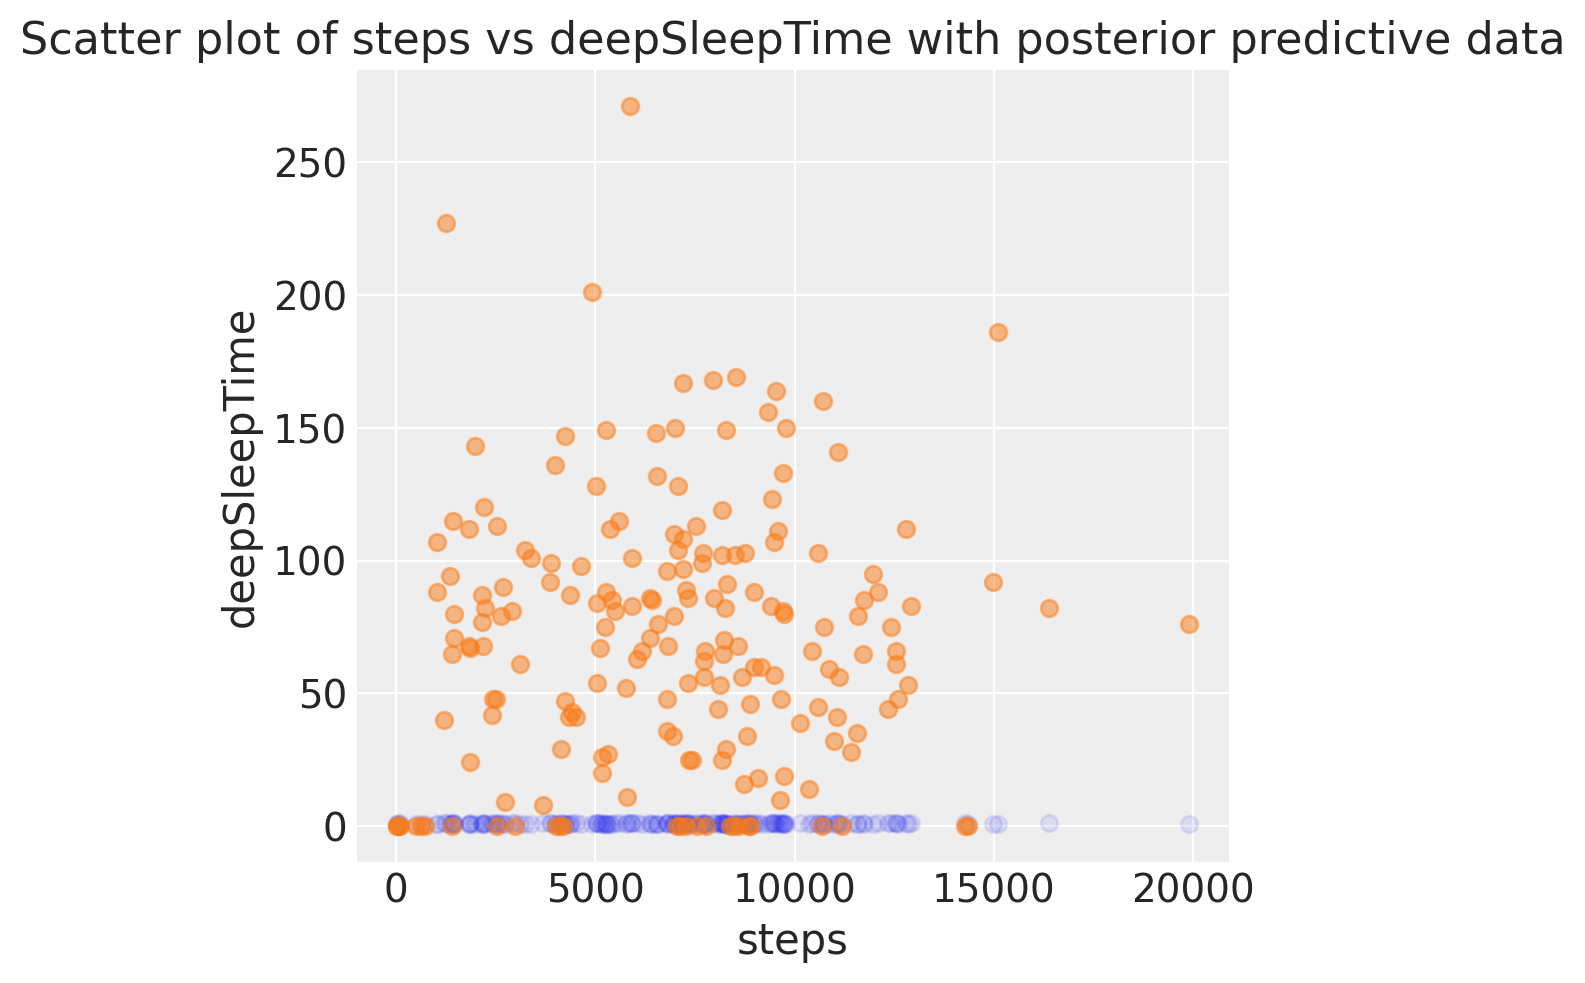

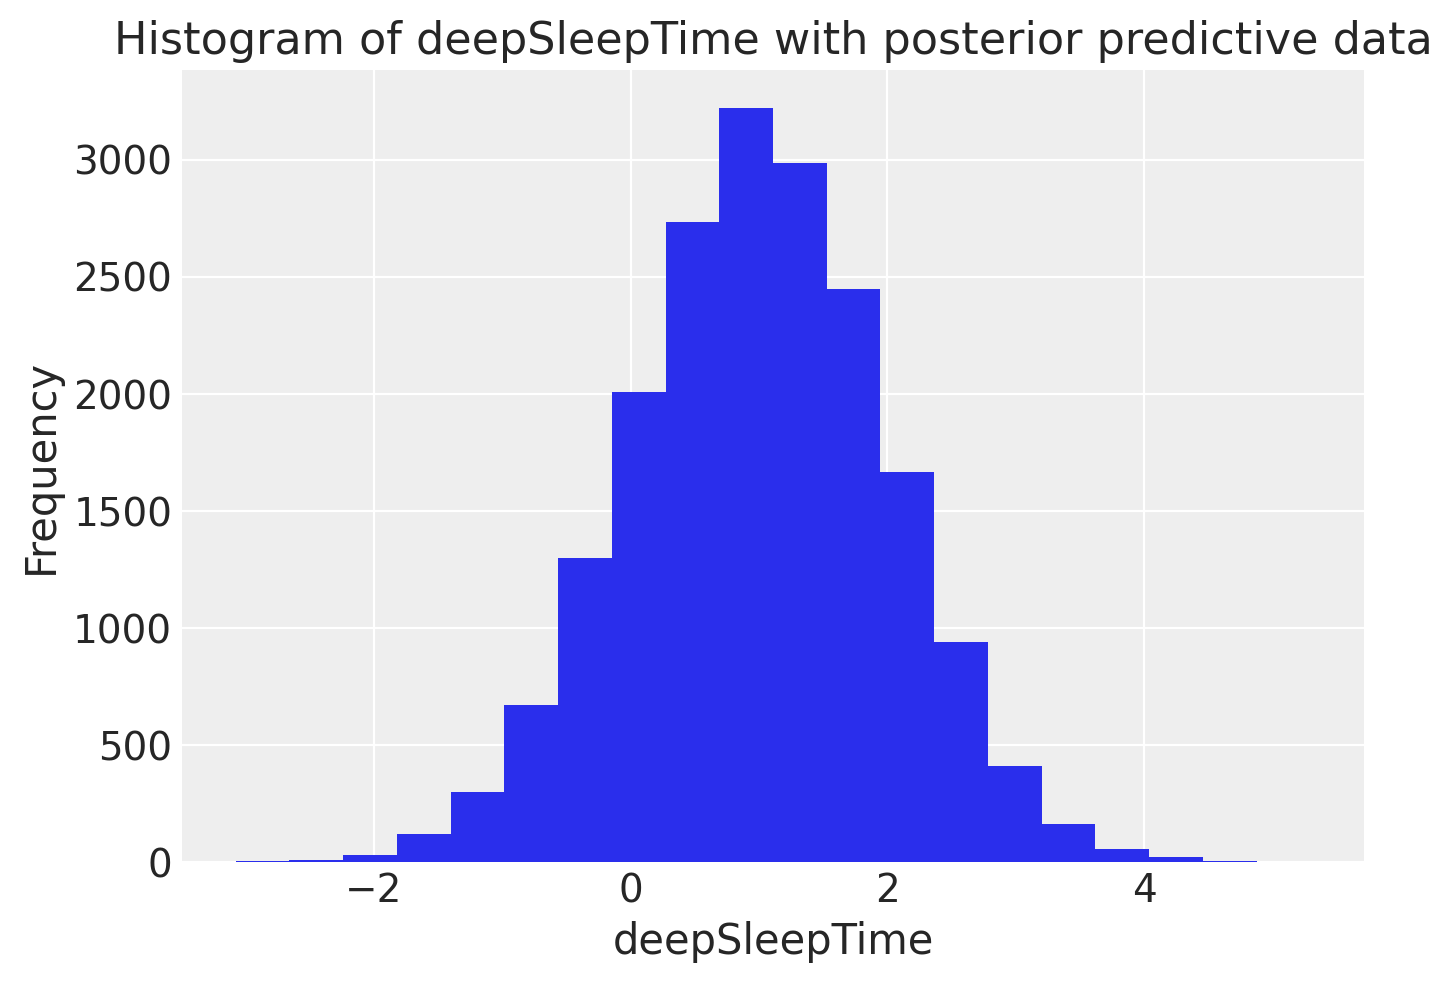

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,0.1,0.005,0.091,0.109,0.0,0.0,1818.0,1365.0,1.0
β1,0.1,0.005,0.091,0.109,0.0,0.0,1632.0,1181.0,1.0


In [ ]:
# Perform posterior predictive checks
ppc = pm.sample_posterior_predictive(trace, model=binomial_regression_model, samples=100)

# Create a scatter plot of the posterior predictive data
plt.scatter(data['steps'], ppc['deepSleepTime'].mean(axis=0), alpha=0.1)
plt.scatter(data['steps'], data['deepSleepTime'], alpha=0.5)
plt.xlabel('steps')
plt.ylabel('deepSleepTime')
plt.title('Scatter plot of steps vs deepSleepTime with posterior predictive data')
plt.show()

# Create a histogram of the posterior predictive data
plt.hist(ppc['deepSleepTime'].flatten(), bins=20)
plt.xlabel('deepSleepTime')
plt.ylabel('Frequency')
plt.title('Histogram of deepSleepTime with posterior predictive data')
plt.show()

# Summarize the posterior distributions of the parameters
az.summary(trace, var_names=["β0", "β1"])

# > In this posterior checks and summary results , the models does not fit as same as Model-4  properly but we can only small percentage of data can be expressed via steps. In others words there are so many different factor which affected the deepSleepTİme rather than number of step.

# > Comparing the results of Model 4 and Model 5, it appears that the two tables are generated from similar analyses or datasets. The mean values for both coefficients are the same in both tables, and the standard deviation values for both coefficients are also similar between the two tables. The HDI intervals for both coefficients are also similar between the two tables.

# > The r_hat values for both coefficients in Model 4 and Model 5 are close to 1 indicating that the chains have likely converged well. The ESS values for both coefficients are also similar between the two tables.

# >  It's difficult to determine which model is more accurate without more information about the specific analysis or dataset that was used to generate them and how the accuracy was measured. However, based on the values provided in the tables, both models seem to have similar results, and the uncertainty in the estimated coefficients is low

# > Consequently, the different  5 model has been developed in this project. The data has been derived from Xiaomi Bip Lite smart watch. Some features has been analyzed according to GLM analyses and some result has been evalueted.

# > The results shows that there is no best model for the GLM with the data we have. The data number must be increase also feature analyses must be applied properly. Thirdly, different approach can be applied the data also for best practice perpective should be changed usch as heartRate analyses.

# > In future work, heartRate can be analyze and trend can be determined and some relevant and irrelevant cases can be work together via these data. 